## About Data

1. client_id = A unique ID generated by the CRM for a potential customer or learner.Represents the customer account, not the device or login.

2. user_id = A unique ID for the user profile inside the learning platform. One client_id can map to multiple user_id if a single parent has multiple children.

3. first_trial_appointment_date = The date when the student first booked or attended a trial class. If missing, it means the student never scheduled a trial.

4. first_payment_date = The date when the user first paid for any course. Null means the user never purchased.

5. os = The operating system used by the student when accessing the app (Android, iOS, Windows, etc.). Used for product analytics or behaviour studies.

6. tutor =The name or ID of the tutor assigned for the trial class or first classes. Missing for users who never reached that stage.

7. job = The parent's job category. Used for segmentation, e.g., working professionals vs. homemakers. Often collected during onboarding.

8. task_class = Internal internal label representing the student’s class category or task group. Often assigned after trial class evaluation. Missing for users who did not complete the evaluation.

9. average_score= The student’s performance score in the learning platform (internal metric). Derived from activities, assessments, or homework.

10. homework_done = Total number of homework tasks completed by the student. Zero doesn’t always mean “not done”; it might mean “never studied long enough.”

11. paywall_paid = Boolean value: True = the user has paid, False = not paid. Derived from transaction status.

12. school_name  =  Name of the school the student attends (if collected). Often missing for early-stage leads.

13. desktop_enter = Indicates whether the student accessed the platform on a desktop at least once. Binary (0/1). Useful for behavioural segmentation.

14. nps_score = Net Promoter Score rating (0–10) given by the parent/student. Very rarely collected. Almost the whole column is missing.

15. add_homework_done = Additional homework completed beyond the standard tasks. Usually used for measuring engagement.

16. call_date = The date when an internal counsellor or sales team called the parent/student. This is often the most recent interaction and is extremely important for deduplication. Think of it as the “last touched date”.

17. first_visit_date = The date the user first visited the platform (website or app). This is their entry point into the funnel. Usually earlier than trial or payment dates.

18. region = Geographical region of the user (North/South/East/West). Often collected only during advanced stages, hence mostly missing.

19. is_big_city = Indicator flag: 1 = user lives in a top-tier metro city 0 = user lives in a small town or rural area Collected using phone number pin code or manual tagging.

# Insights Requires

Below is a **role-wise list** of insights different stakeholders typically expect from this kind of EdTech dataset.

---

### **1. Product Team**


* Device usage trends by OS
* Homework completion patterns
* Average performance score distribution
* Engagement drop-off after first visit
* Desktop vs mobile behaviour differences
* Impact of tutor assignment on scores
* Early signals of serious vs casual users
* When users are most active (day/week patterns)

---

### **2. Sales Team**


* Lead-to-trial conversion rate
* Trial-to-payment conversion rate
* Users contacted but not converted
* Best time periods to call parents
* Cities/regions with highest conversion
* Which parent job categories convert best
* Which tutors correlate with higher conversions
* How many leads never reached trial stage

---

### **3. Marketing Team**

* Demographic segments that engage more
* OS-based or city-based user differences
* Campaign funnel performance
* Who is most likely to complete trial class
* Which parent profiles respond better to outreach
* Drop-off points in acquisition funnel
* Regions with highest engagement (where region is available)

---

### **4. Academic/Training Team**


* Distribution of scores across students
* Homework completion vs academic improvement
* Tutor-wise score performance
* Time taken to improve after joining
* Students needing intervention (low homework and low score)
* Students progressing the fastest
* Effects of first_trial_appointment_date on learning outcomes

---

### **5. Management / Leadership**


* Total active learners
* Paying vs non-paying users
* Revenue-contributing funnel (visit → trial → payment)
* Growth of trial classes over time
* CAC estimation via behaviour patterns
* High-engagement vs low-engagement cohorts
* City-level performance (big cities vs non-big cities)
* Strategic bottlenecks in user journey

---

### **6. Customer Success Team**


* Who completed homework but didn’t convert
* Users who visited but never attended trial
* Parents requiring repeated calls
* NPS score groups (though sparse)
* Who drops after first class
* Common pain points (inferred from behaviour gaps)

---

### **7. Data Science / Analytics Team**

* Variables that most strongly correlate with payment
* Behaviour that predicts conversion
* Segmentation of learners by engagement level
* Churn probability features
* Early signals of high-performing students
* Features to build LTV prediction models

---


# 1.  Importing Libraries

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
raw_data = pd.read_csv('edtechdata.csv')

In [5]:
data = raw_data.copy()

# 2. Summarizing data

In [6]:
data.shape

(124517, 19)

In [7]:
data.columns

Index(['client_id', 'user_id', 'first_trial_appointment_date',
       'first_payment_date', 'os', 'tutor', 'job', 'task_class',
       'average_score', 'homework_done', 'paywall_paid', 'school_name',
       'desktop_enter', 'nps_score', 'add_homework_done', 'call_date',
       'first_visit_date', 'region', 'is_big_city'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124517 entries, 0 to 124516
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   client_id                     124517 non-null  object 
 1   user_id                       124517 non-null  object 
 2   first_trial_appointment_date  20657 non-null   object 
 3   first_payment_date            921 non-null     object 
 4   os                            124501 non-null  object 
 5   tutor                         48697 non-null   object 
 6   job                           38608 non-null   object 
 7   task_class                    123212 non-null  float64
 8   average_score                 121500 non-null  float64
 9   homework_done                 124517 non-null  int64  
 10  paywall_paid                  124517 non-null  bool   
 11  school_name                   124517 non-null  object 
 12  desktop_enter                 124517 non-nul

In [9]:
data.head()

,client_id,user_id,first_trial_appointment_date,first_payment_date,os,tutor,job,task_class,average_score,homework_done,paywall_paid,school_name,desktop_enter,nps_score,add_homework_done,call_date,first_visit_date,region,is_big_city
0,2989400374e8abf2c4ac8921531cd1c0,92cc220d5171deb66e947d5b4ffce8bd,NaN,NaN,Android,NaN,NaN,6.0,80.222222,9,False,Unknown,True,NaN,0,2020-09-14 13:29,2020-04-22 09:48,NaN,True
1,c8bce51779d3f746baaf2f59ddef69cd,80cf7575a4dc3a3a8cb30e3262d23e19,NaN,NaN,Windows,I am doing now,IT,11.0,98.250000,4,False,Unknown,True,NaN,0,2020-07-16 15:03,2020-04-24 17:29,NaN,True
2,a6bad682ac10999865570bee0e11b9f6,3b671290e690217ce17052c9c52afa31,NaN,NaN,Android,No,NaN,5.0,68.000000,1,False,Unknown,True,NaN,0,2020-08-25 10:03,2020-04-15 10:10,NaN,True
3,b85c31b416b405dd9b9498bdde703f4e,03e4d2186bc5231cd7f302ac76e1de76,NaN,NaN,iOS,NaN,NaN,7.0,78.571429,7,False,Unknown,True,NaN,0,2020-08-13 14:41,2020-04-28 14:04,NaN,True
4,93c44d3b5d850f60ada1faf9db83b7f7,ec8a79f01156b3c82a27ca947f49d319,NaN,NaN,Android,No,Finance,6.0,92.000000,4,False,Unknown,True,NaN,0,2020-08-27 13:23,2020-04-28 11:26,NaN,True


# 3. Handling duplicated Values
## 3.1 Overall Duplicates

In [10]:
# There are 79 duplicated rows
# Lets view only the second and later occurrences of each duplicated group.
data[data.duplicated()]

,client_id,user_id,first_trial_appointment_date,first_payment_date,os,tutor,job,task_class,average_score,homework_done,paywall_paid,school_name,desktop_enter,nps_score,add_homework_done,call_date,first_visit_date,region,is_big_city
16674,476eb8249fe57fcf568969aae59188c9,386bc96a4cb16573c0d5dab664f5fb44,2020-08-12 13:26,NaN,iOS,NaN,NaN,5.0,96.00,2,False,Unknown,True,NaN,0,2020-08-07 17:53,2020-05-21 12:36,NaN,False
22136,288995175d4599ee044323f01bb54189,40c8319f081132770db89e256b323989,2020-08-28 12:38,NaN,iOS,No,NaN,7.0,96.50,6,False,Unknown,True,NaN,0,2020-08-27 11:29,2020-04-30 12:56,NaN,True
24588,5f4bf445ad4b42101b76ccb8a10797cd,1cc3910e5abcc3ccedeb36833cd561de,2020-09-08 14:40,NaN,iOS,NaN,NaN,8.0,59.00,1,False,Unknown,True,NaN,0,2020-08-17 15:30,2020-04-20 10:36,NaN,False
29460,7d8de1c1a897dfe859d86e58fdb7f9da,fbede96855640b9544acbadaee2d7505,2020-09-07 10:59,NaN,Windows,Earlier,Finance,6.0,90.20,5,False,Unknown,True,NaN,0,2020-09-07 10:55,2020-04-23 12:21,NaN,False
32324,38a0a0142e0a32fe622adaf7529492d5,3b5f402ca2efaf44cd9d7f2b608c32dc,2020-08-14 13:04,NaN,iOS,NaN,NaN,7.0,98.00,1,False,Unknown,True,NaN,0,2020-08-13 11:23,2020-04-27 14:02,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122692,555056ec8089cd786609526eb4413985,3aeaf957b51260e5541045f48979f75a,2020-08-07 15:49,NaN,iOS,No,Science,5.0,84.50,2,False,Unknown,False,NaN,0,2020-08-06 15:35,2020-04-26 12:24,NaN,True
122866,369ce973a1764436037fd98aac5581e3,2cd5df6d9aa7ed78cc7253707c3b9fbe,2020-08-21 15:46,NaN,iOS,No,Medicine,6.0,64.00,3,False,Unknown,True,NaN,0,2020-08-21 15:39,2020-05-18 09:20,NaN,True
123254,146539f56b630921b0bd94406f90dacb,b8a7258b8c0df4ce2710ee30c3b38d12,2020-08-20 16:57,NaN,Android,NaN,NaN,8.0,67.00,1,False,Unknown,True,NaN,0,2020-08-18 14:53,2020-04-15 08:56,NaN,True
124401,a053996f6635ba0ecdbe444672035dcd,0b7fad8f911b236e43ce6aedcfcd6e9e,2020-08-24 14:31,NaN,Windows,NaN,NaN,8.0,95.50,2,False,Unknown,True,NaN,0,2020-08-24 14:18,2020-04-21 20:49,NaN,True


In [11]:
# Lets see shape of original + duplicate
data[data.duplicated(keep = False)].shape

(158, 19)

In [12]:
# and only duplicated rows are
data[data.duplicated()].shape

(79, 19)

In [13]:
# there are 79 rows that are duplicated creating 158 rows. 79 x 2 = 158 , therefore 79 rows are duplicated once 

In [14]:
# the count can also be found using sum
data.duplicated(keep = False).sum()

158

In [15]:
data.duplicated().sum()

79

In [16]:
# Lets remove duplicates
data.drop_duplicates(keep = "first", inplace = True)

In [17]:
data.shape

(124438, 19)

In [18]:
# earlier the data was of (124517, 19), and now of (124438, 19). 124517 - 79 = 124438. So duplicates are now removed.

In [19]:
# now we have to see one by one each column. From client id and user id we have to see user id.
# Client id means parents/ child while user ids mean child
# As one or more clients can have multiple id as one more parent can have multiple child. we first look that if one person has made more than one entries

## 3.2. Handling duplicates in User_id Column

In [20]:
# lets view all original + Copy
data[data.duplicated(subset = ['user_id'], keep = False)]

,client_id,user_id,first_trial_appointment_date,first_payment_date,os,tutor,job,task_class,average_score,homework_done,paywall_paid,school_name,desktop_enter,nps_score,add_homework_done,call_date,first_visit_date,region,is_big_city
17,c6381440b04e77eebd043b10f4eb3ccb,615aee45b8b186b2b198037508812a3e,NaN,NaN,Android,No,Education,8.0,83.000000,6,False,Unknown,False,NaN,0,2020-09-09 10:31,2020-04-30 07:34,NaN,False
61,48a9f02ef0baf584e1679497286b9652,b693103fcb3ef8942eabb5cbea97b3fa,2020-08-24 14:03,NaN,iOS,No,Medicine,5.0,93.000000,4,False,Unknown,True,NaN,0,2020-08-22 10:42,2020-05-21 14:35,NaN,True
69,63acb37e1cf2bebfd0862959e90e2013,c5afdc24279cdb399875ed6e52d35c6f,2020-09-09 11:30,NaN,Android,NaN,NaN,9.0,60.333333,3,False,Unknown,True,NaN,0,2020-09-09 11:22,2020-05-08 08:29,NaN,True
77,7259b658f68c5339e689b8f34267e3c4,2bfccf755216683c24b26b279e04d71a,2020-09-04 13:47,NaN,iOS,No,Education,5.0,92.500000,2,False,Unknown,True,NaN,0,2020-08-31 14:26,2020-05-20 11:05,NaN,True
79,b137ec599634d5f50085427657382c6e,03a7e4ad4eace0c9605ecf711984aac1,2020-09-09 11:48,NaN,Android,NaN,NaN,5.0,65.500000,2,False,Unknown,True,NaN,0,2020-09-09 11:42,2020-04-16 09:25,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124439,72201d7a0594dc089e67d7c34faa0212,0ebf9cabfd2ba1db22f4097ff83b4826,NaN,NaN,iOS,NaN,NaN,7.0,100.000000,1,False,Unknown,True,NaN,0,2020-08-13 10:37,2020-04-30 08:57,NaN,True
124482,6f52b770162ce3b23935f04f901c5c60,148a1f26ee87dd60780fabbca1cda343,2020-08-31 20:24,NaN,iOS,I am doing now,NaN,7.0,80.600000,5,False,MUNITsIPAL'NOE AVTONOMNOE OBSchEOBRAZOVATEL'NO...,True,NaN,0,2020-08-27 15:44,2020-05-18 11:03,NaN,False
124492,183af370482f9919cb74ae568ab1beb9,49af2cd40fd0ba7af39d24a52055f030,NaN,NaN,iOS,NaN,NaN,5.0,49.000000,1,False,Unknown,True,NaN,0,2020-08-13 16:55,2020-05-12 17:52,NaN,True
124500,a9350addcd0a462a6f7b477c947ba3f4,080a045b0907476bee3bc97f7a46f2c1,NaN,NaN,iOS,NaN,NaN,6.0,90.000000,1,False,Unknown,True,NaN,0,2020-08-17 15:35,2020-04-15 11:07,NaN,False


In [21]:
# no. of original + duplicated
data.duplicated(subset = ['user_id'], keep = False).sum()

11303

In [22]:
# no. of only duplicated
data.duplicated(subset = ['user_id']).sum()

5874

In [23]:
#  Duplicates will be handled based on call date. call dates have no null values. that means we can handle duplicates using that.
# The last call date means last time somebody called a person and might have filled the data.

In [24]:
# converting call date and first visit date to date time format

In [25]:
data['call_date'] = pd.to_datetime(data['call_date'])

In [26]:
data['first_visit_date'] = pd.to_datetime(data['first_visit_date'])

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124438 entries, 0 to 124516
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   client_id                     124438 non-null  object        
 1   user_id                       124438 non-null  object        
 2   first_trial_appointment_date  20578 non-null   object        
 3   first_payment_date            921 non-null     object        
 4   os                            124422 non-null  object        
 5   tutor                         48674 non-null   object        
 6   job                           38590 non-null   object        
 7   task_class                    123135 non-null  float64       
 8   average_score                 121426 non-null  float64       
 9   homework_done                 124438 non-null  int64         
 10  paywall_paid                  124438 non-null  bool          
 11  school_name  

In [28]:
# dropping all duplicates accept for the one with last call_date
data = data.sort_values('call_date').drop_duplicates(subset=['user_id'], keep='last')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118564 entries, 118211 to 52391
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   client_id                     118564 non-null  object        
 1   user_id                       118564 non-null  object        
 2   first_trial_appointment_date  17410 non-null   object        
 3   first_payment_date            807 non-null     object        
 4   os                            118549 non-null  object        
 5   tutor                         45396 non-null   object        
 6   job                           35995 non-null   object        
 7   task_class                    117344 non-null  float64       
 8   average_score                 115768 non-null  float64       
 9   homework_done                 118564 non-null  int64         
 10  paywall_paid                  118564 non-null  bool          
 11  school_na

In [30]:
data.duplicated(subset = ['user_id']).sum()

0

In [31]:
# now user Ids are all unique. That means each data point refers to Unique student. 

In [32]:
# lets view which other columns have duplicates values and then we will analyze them

In [33]:
dupe_columns = []
column_names = data.columns

for i in column_names:
    dupe_values = data[i].duplicated().sum()
    if dupe_values > 0:
        dupe_columns.append(i)
    else:
        pass
print(dupe_columns)        

['first_trial_appointment_date', 'first_payment_date', 'os', 'tutor', 'job', 'task_class', 'average_score', 'homework_done', 'paywall_paid', 'school_name', 'desktop_enter', 'nps_score', 'add_homework_done', 'call_date', 'first_visit_date', 'region', 'is_big_city']


All these columns can have duplicates. There is nothing wrong in them. Therefore now lets handle missing values

# 4. Handling Missing Values

In [34]:
# first lets view data
# create a dataframe
null_values_count = pd.DataFrame(columns=['column_name', '%_nulls'])

for col in column_names:
    per_null = round((data[col].isna().sum() / len(data)) * 100, 2)
    new_row = pd.DataFrame({'column_name': [col], '%_nulls': [per_null]})
    null_values_count = pd.concat([null_values_count, new_row], ignore_index=True)

print(null_values_count)
    

                     column_name  %_nulls
0                      client_id     0.00
1                        user_id     0.00
2   first_trial_appointment_date    85.32
3             first_payment_date    99.32
4                             os     0.01
5                          tutor    61.71
6                            job    69.64
7                     task_class     1.03
8                  average_score     2.36
9                  homework_done     0.00
10                  paywall_paid     0.00
11                   school_name     0.00
12                 desktop_enter     0.00
13                     nps_score    99.78
14             add_homework_done     0.00
15                     call_date     0.00
16              first_visit_date     0.00
17                        region    90.46
18                   is_big_city     0.00


Columns that have considerable missing values are
1. first_trial_appointment_date
2. first_payment_date
3. tutor
4. job
5. nps_score
6. region

Columns that have less number of missing values are
1. os
2. task class
3. average score

## 4.1 Dropping non useful columns nps_score and region

In [35]:
# nps is not useful
# region and is big city are similar types. so region can be dropped

In [36]:
# creating a checkpoint
data_wd = data.copy() 

In [37]:
data_wd = data_wd.drop('nps_score', axis = 1)

In [38]:
data_wd = data_wd.drop('region', axis = 1)

## 4.2 Handling missing values  and data types column wise

### 4.2.1 First_Trial_Appointment_Date

The date when the student first booked or attended a trial class. If missing, it means the student never scheduled a trial.

In [39]:
type(data_wd['first_trial_appointment_date'])

pandas.core.series.Series

In [40]:
data_wd['first_trial_appointment_date'] = pd.to_datetime(data_wd['first_trial_appointment_date'])

In [41]:
data_wd['first_trial_appointment_date'].isna().sum()

101154

since it is in date time 
And null tells that trial was not scheduled
We will keep this column as it is 
Rather we will add new column that tells us wether appointment was sceduled (0) or not(1) 

In [42]:
data_wd['first_trial_missing'] = data_wd['first_trial_appointment_date'].isna().astype(int)

In [43]:

data_wd.head(5)

,client_id,user_id,first_trial_appointment_date,first_payment_date,os,tutor,job,task_class,average_score,homework_done,paywall_paid,school_name,desktop_enter,add_homework_done,call_date,first_visit_date,is_big_city,first_trial_missing
118211,e70b23d3a33bfd86cf9fb4abc3841bfc,deb6a7518e99e7cfa03d55abaa6bcf7e,NaT,NaN,Android,No,Finance,9.0,19.000000,1,False,Unknown,True,0,2020-06-02 15:17:00,2020-05-13 13:27:00,True,1
98383,abbf738c6741493d522a795573fc4119,265fbb0ad917dce4c8d507ddb062c779,NaT,NaN,Android,No,NaN,6.0,87.000000,5,False,Unknown,True,0,2020-06-02 15:18:00,2020-04-18 12:06:00,True,1
14361,0a71cec90c2c2fb90fe4e46cc122ac7e,428611238d0342ee18bb5e6536c67acf,NaT,NaN,Windows,No,NaN,4.0,95.000000,1,False,Unknown,True,0,2020-06-02 15:22:00,2020-05-14 12:50:00,True,1
70369,5a8e1f06faec2327f725164165c118aa,3bf4b18794aad476c9f44770e6236218,NaT,NaN,Android,No,NaN,5.0,95.000000,1,False,Unknown,True,0,2020-06-02 15:26:00,2020-05-15 07:11:00,True,1
64922,2032454e404a415cbc6bf8180e485845,235defd54f56856eeff0822ebe1f157c,NaT,NaN,Windows,No,Finance,6.0,91.666667,3,False,Unknown,True,0,2020-06-02 15:27:00,2020-04-27 13:51:00,True,1


### 4.2.2 first_payment_date

Converting it into date time format

In [44]:
data_wd['first_payment_date'] = pd.to_datetime(data_wd['first_payment_date'])

Since this is a datetime datatype, we will make a new column named first_payment_flag that will

1 → user has paid at least once

0 → user has never paid

In [45]:
data_wd['first_payment_flag'] = data_wd['first_payment_date'].notna().astype(int)

In [46]:
data_wd.head(5)

,client_id,user_id,first_trial_appointment_date,first_payment_date,os,tutor,job,task_class,average_score,homework_done,paywall_paid,school_name,desktop_enter,add_homework_done,call_date,first_visit_date,is_big_city,first_trial_missing,first_payment_flag
118211,e70b23d3a33bfd86cf9fb4abc3841bfc,deb6a7518e99e7cfa03d55abaa6bcf7e,NaT,NaT,Android,No,Finance,9.0,19.000000,1,False,Unknown,True,0,2020-06-02 15:17:00,2020-05-13 13:27:00,True,1,0
98383,abbf738c6741493d522a795573fc4119,265fbb0ad917dce4c8d507ddb062c779,NaT,NaT,Android,No,NaN,6.0,87.000000,5,False,Unknown,True,0,2020-06-02 15:18:00,2020-04-18 12:06:00,True,1,0
14361,0a71cec90c2c2fb90fe4e46cc122ac7e,428611238d0342ee18bb5e6536c67acf,NaT,NaT,Windows,No,NaN,4.0,95.000000,1,False,Unknown,True,0,2020-06-02 15:22:00,2020-05-14 12:50:00,True,1,0
70369,5a8e1f06faec2327f725164165c118aa,3bf4b18794aad476c9f44770e6236218,NaT,NaT,Android,No,NaN,5.0,95.000000,1,False,Unknown,True,0,2020-06-02 15:26:00,2020-05-15 07:11:00,True,1,0
64922,2032454e404a415cbc6bf8180e485845,235defd54f56856eeff0822ebe1f157c,NaT,NaT,Windows,No,Finance,6.0,91.666667,3,False,Unknown,True,0,2020-06-02 15:27:00,2020-04-27 13:51:00,True,1,0


### 4.2.3. os

The operating system used by the student when accessing the app (Android, iOS, Windows, etc.). Used for product analytics or behaviour studies.

In [47]:
# lets see what all values are thre in this column
data_wd['os'].unique()

array(['Android', 'Windows', 'Mac OS', 'iOS', 'Linux', 'Ubuntu', nan,
       'Solaris'], dtype=object)

In [48]:
# so it is a categorical column. For our analysis lets leave categories as it is. but we should handle missing values
# there are only 0.01 % missing values.
# Lets replace missing values in this coloumn with Other

In [49]:
data_wd['os'].fillna('Other', inplace=True)

In [50]:
# lets check value counts
data_wd['os'].value_counts()

iOS        52736
Android    42477
Windows    22244
Mac OS      1035
Linux         44
Other         15
Ubuntu        12
Solaris        1
Name: os, dtype: int64

### 4.2.4. tutor

The name or ID of the tutor assigned for the trial class or first classes. Missing for users who never reached that stage.

In [51]:
data_wd['tutor'].value_counts()

Earlier           19074
I am doing now    14167
No                12155
Name: tutor, dtype: int64

In [52]:
# it has 3 types of values
# also it has 61.71 % null values
# we will replace missing values by 'Not Assigned'

In [53]:
data_wd['tutor'].fillna('Not Assigned', inplace = True)

In [54]:
data_wd['tutor'].value_counts()

Not Assigned      73168
Earlier           19074
I am doing now    14167
No                12155
Name: tutor, dtype: int64

In [55]:
# but Not assigned and no are same categories. we will replace both with Unassigned
# we will replace Earlier with Former and I am doing now with Ongoing

In [56]:
data_wd['tutor'].replace('Not Assigned', 'Unassigned', inplace = True)

In [57]:
data_wd['tutor'].replace('No', 'Unassigned', inplace = True)

In [58]:
data_wd['tutor'].replace('Earlier', 'Former', inplace = True)

In [59]:
data_wd['tutor'].replace('I am doing now', 'Ongoing', inplace = True)

In [60]:
data_wd['tutor'].value_counts()

Unassigned    85323
Former        19074
Ongoing       14167
Name: tutor, dtype: int64

In [61]:
data_wd['tutor'].isna().sum()

0

we can also use;

data_wd['tutor'] = data_wd['tutor'].fillna('No')

data_wd['tutor'] = data_wd['tutor'].replace({
    'No': 'Unassigned',
    'Earlier': 'Former_Tutor',
    'I am doing now': 'Current_Tutor'
})


### 4.2.5 job

The parent's job category. Used for segmentation, e.g., working professionals vs. homemakers. Often collected during onboarding.

In [62]:
# first lets check whats inside this column
data_wd['job'].value_counts()

Finance      10680
Medicine      8513
Education     7150
IT            6374
Science       3278
Name: job, dtype: int64

In [63]:
data_wd['job'].isna().sum()

82569

In [64]:
# we should handle missing values by replacing them with unknown. 
data_wd['job'].fillna('Unknown', inplace = True)

In [65]:
data_wd['job'].isna().sum()

0

In [66]:
data_wd['job'].value_counts()

Unknown      82569
Finance      10680
Medicine      8513
Education     7150
IT            6374
Science       3278
Name: job, dtype: int64

### 4.2.6. task_class

Internal label representing the student’s class category or task group. Often assigned after trial class evaluation. Missing for users who did not complete the evaluation.

In [67]:
data_wd['task_class'].value_counts()

6.0     24987
5.0     24856
7.0     24125
8.0     20793
9.0      9522
11.0     4899
4.0      3422
10.0     2664
3.0      1019
2.0       833
1.0       224
Name: task_class, dtype: int64

In [68]:
data_wd['task_class'].isna().sum()

1220

In [69]:
# replace missing values with 0
data_wd['task_class'].fillna(0, inplace = True)

In [70]:
data_wd['task_class'].value_counts()

6.0     24987
5.0     24856
7.0     24125
8.0     20793
9.0      9522
11.0     4899
4.0      3422
10.0     2664
0.0      1220
3.0      1019
2.0       833
1.0       224
Name: task_class, dtype: int64

In [71]:
data_wd['task_class'].isna().sum()

0

In [72]:
# Lets convert the data into int type
data_wd['task_class'] = data_wd['task_class'].astype(float)

In [73]:
data_wd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118564 entries, 118211 to 52391
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   client_id                     118564 non-null  object        
 1   user_id                       118564 non-null  object        
 2   first_trial_appointment_date  17410 non-null   datetime64[ns]
 3   first_payment_date            807 non-null     datetime64[ns]
 4   os                            118564 non-null  object        
 5   tutor                         118564 non-null  object        
 6   job                           118564 non-null  object        
 7   task_class                    118564 non-null  float64       
 8   average_score                 115768 non-null  float64       
 9   homework_done                 118564 non-null  int64         
 10  paywall_paid                  118564 non-null  bool          
 11  school_na

### 4.2.7. average_score

In [74]:
data_wd['average_score'].value_counts()

100.000000    6172
94.000000     1705
92.000000     1684
83.000000     1670
97.000000     1657
              ... 
75.497024        1
62.307692        1
51.071429        1
97.066667        1
81.083333        1
Name: average_score, Length: 4345, dtype: int64

In [75]:
data_wd['average_score'].isna().sum()

2796

In [76]:
# lets replace missing values with average scores
data_wd['average_score'].fillna(data['average_score'].mean(), inplace = True)

In [77]:
data_wd['average_score'].isna().sum()

0

In [78]:
#converting data to float type
data_wd['average_score'] = data_wd['average_score'].astype(float)

In [79]:
data_wd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118564 entries, 118211 to 52391
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   client_id                     118564 non-null  object        
 1   user_id                       118564 non-null  object        
 2   first_trial_appointment_date  17410 non-null   datetime64[ns]
 3   first_payment_date            807 non-null     datetime64[ns]
 4   os                            118564 non-null  object        
 5   tutor                         118564 non-null  object        
 6   job                           118564 non-null  object        
 7   task_class                    118564 non-null  float64       
 8   average_score                 118564 non-null  float64       
 9   homework_done                 118564 non-null  int64         
 10  paywall_paid                  118564 non-null  bool          
 11  school_na

### 4.2.8. homework_done

Total number of homework tasks completed by the student. Zero doesn’t always mean “not done”; it might mean “never studied long enough.”

In [80]:
# lets see whats inside this column
data_wd['homework_done'].value_counts()

1      41855
2      22203
3      14264
4       9830
5       7048
       ...  
233        1
78         1
340        1
167        1
68         1
Name: homework_done, Length: 98, dtype: int64

In [81]:
data_wd['homework_done'].isna().sum()

0

There are no missing values to handle. data type is int already. No transfomrations required

### 4.2.9. paywall_paid

Boolean value: True = the user has paid, False = not paid. Derived from transaction status.

In [82]:
# lets see whats inside this column
data_wd['paywall_paid'].value_counts()

False    118556
True          8
Name: paywall_paid, dtype: int64

In [83]:
data_wd['paywall_paid'].isna().sum()

0

nothing should be done for now. if machine learning to be done, we will convert it to 1 and 0

### 4.2.10. school_name

Name of the school the student attends (if collected). Often missing for early-stage leads.

In [84]:
# lets see whats inside this column
data_wd['school_name'].value_counts()

Unknown                                                                                                                                                                115965
MUNITsIPAL'NOE AVTONOMNOE OBSchEOBRAZOVATEL'NOE UChREZhDENIE DOMODEDOVSKAJa SREDNJaJa OBSchEOBRAZOVATEL'NAJa ShKOLA №4 S UGLUBLENNYM IZUChENIEM OTDEL'NYH PREDMETOV        35
MUNITsIPAL'NOE BJuDZhETNOE OBSchEOBRAZOVATEL'NOE UChREZhDENIE "SREDNJaJa OBSchEOBRAZOVATEL'NAJa ShKOLA № 2"                                                                34
MUNITsIPAL'NOE BJuDZhETNOE OBSchEOBRAZOVATEL'NOE UChREZhDENIE SREDNJaJa OBSchEOBRAZOVATEL'NAJa ShKOLA № 9                                                                  18
MUNITsIPAL'NOE OBSchEOBRAZOVATEL'NOE BJuDZhETNOE UChREZhDENIE "SREDNJaJa OBSchEOBRAZOVATEL'NAJa ShKOLA № 2" GORODSKOGO OKRUGA ROShAL' MOSKOVSKOJ OBLASTI                   18
                                                                                                                                  

In [85]:
data_wd['school_name'].isnull().sum()

0

In [86]:
# although There are no null values , but most of them are unknown. therefore its better that we drop this column
data_wd.drop('school_name', axis = 1, inplace = True)

In [87]:
data_wd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118564 entries, 118211 to 52391
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   client_id                     118564 non-null  object        
 1   user_id                       118564 non-null  object        
 2   first_trial_appointment_date  17410 non-null   datetime64[ns]
 3   first_payment_date            807 non-null     datetime64[ns]
 4   os                            118564 non-null  object        
 5   tutor                         118564 non-null  object        
 6   job                           118564 non-null  object        
 7   task_class                    118564 non-null  float64       
 8   average_score                 118564 non-null  float64       
 9   homework_done                 118564 non-null  int64         
 10  paywall_paid                  118564 non-null  bool          
 11  desktop_e

### 4.2.11 desktop_enter

Indicates whether the student accessed the platform on a desktop at least once. Binary (0/1). Useful for behavioural segmentation.

In [88]:
# lets see whats inside this column
data_wd['desktop_enter'].value_counts()

True     98167
False    20397
Name: desktop_enter, dtype: int64

In [89]:
data_wd['desktop_enter'].isnull().sum()

0

In [90]:
# nothing should be done with this column for now.

### 4.2.12 add_homework_done

 Additional homework completed beyond the standard tasks. Usually used for measuring engagement.

In [91]:
# lets see whats inside this column
data_wd['add_homework_done'].value_counts()

0      116152
1        1409
2         429
3         197
4          88
        ...  
32          1
229         1
70          1
163         1
18          1
Name: add_homework_done, Length: 70, dtype: int64

In [92]:
data_wd['add_homework_done'].isnull().sum()

0

In [93]:
# nothing should be done for this column

### 4.2.13. is_big_city 

In [94]:
data['is_big_city'].value_counts()

True     98941
False    19623
Name: is_big_city, dtype: int64

In [95]:
data_wd['is_big_city'].isnull().sum()

0

In [96]:
# nothing should be done with this also

### 4.3. Creating checkpoint

In [97]:
clean_data = data_wd.copy()

In [98]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118564 entries, 118211 to 52391
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   client_id                     118564 non-null  object        
 1   user_id                       118564 non-null  object        
 2   first_trial_appointment_date  17410 non-null   datetime64[ns]
 3   first_payment_date            807 non-null     datetime64[ns]
 4   os                            118564 non-null  object        
 5   tutor                         118564 non-null  object        
 6   job                           118564 non-null  object        
 7   task_class                    118564 non-null  float64       
 8   average_score                 118564 non-null  float64       
 9   homework_done                 118564 non-null  int64         
 10  paywall_paid                  118564 non-null  bool          
 11  desktop_e

In [99]:
clean_data.head(5)

,client_id,user_id,first_trial_appointment_date,first_payment_date,os,tutor,job,task_class,average_score,homework_done,paywall_paid,desktop_enter,add_homework_done,call_date,first_visit_date,is_big_city,first_trial_missing,first_payment_flag
118211,e70b23d3a33bfd86cf9fb4abc3841bfc,deb6a7518e99e7cfa03d55abaa6bcf7e,NaT,NaT,Android,Unassigned,Finance,9.0,19.000000,1,False,True,0,2020-06-02 15:17:00,2020-05-13 13:27:00,True,1,0
98383,abbf738c6741493d522a795573fc4119,265fbb0ad917dce4c8d507ddb062c779,NaT,NaT,Android,Unassigned,Unknown,6.0,87.000000,5,False,True,0,2020-06-02 15:18:00,2020-04-18 12:06:00,True,1,0
14361,0a71cec90c2c2fb90fe4e46cc122ac7e,428611238d0342ee18bb5e6536c67acf,NaT,NaT,Windows,Unassigned,Unknown,4.0,95.000000,1,False,True,0,2020-06-02 15:22:00,2020-05-14 12:50:00,True,1,0
70369,5a8e1f06faec2327f725164165c118aa,3bf4b18794aad476c9f44770e6236218,NaT,NaT,Android,Unassigned,Unknown,5.0,95.000000,1,False,True,0,2020-06-02 15:26:00,2020-05-15 07:11:00,True,1,0
64922,2032454e404a415cbc6bf8180e485845,235defd54f56856eeff0822ebe1f157c,NaT,NaT,Windows,Unassigned,Finance,6.0,91.666667,3,False,True,0,2020-06-02 15:27:00,2020-04-27 13:51:00,True,1,0


In [100]:
clean_data.describe()

,task_class,average_score,homework_done,add_homework_done,first_trial_missing,first_payment_flag
count,118564.000000,118564.000000,118564.000000,118564.000000,118564.000000,118564.000000
mean,6.699192,77.228817,3.477868,0.109384,0.853159,0.006806
std,1.861165,19.008480,8.247880,7.206260,0.353948,0.082220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,68.333333,1.000000,0.000000,1.000000,0.000000
50%,7.000000,81.205263,2.000000,0.000000,1.000000,0.000000
75%,8.000000,91.250000,4.000000,0.000000,1.000000,0.000000
max,11.000000,100.000000,2275.000000,2242.000000,1.000000,1.000000


In [101]:
clean_data.to_csv('clean_data.csv', index = False)

# 5. Exploratory Data Analysis

In [102]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118564 entries, 118211 to 52391
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   client_id                     118564 non-null  object        
 1   user_id                       118564 non-null  object        
 2   first_trial_appointment_date  17410 non-null   datetime64[ns]
 3   first_payment_date            807 non-null     datetime64[ns]
 4   os                            118564 non-null  object        
 5   tutor                         118564 non-null  object        
 6   job                           118564 non-null  object        
 7   task_class                    118564 non-null  float64       
 8   average_score                 118564 non-null  float64       
 9   homework_done                 118564 non-null  int64         
 10  paywall_paid                  118564 non-null  bool          
 11  desktop_e

In [103]:
clean_data.shape

(118564, 18)

In [104]:
clean_data.columns

Index(['client_id', 'user_id', 'first_trial_appointment_date',
       'first_payment_date', 'os', 'tutor', 'job', 'task_class',
       'average_score', 'homework_done', 'paywall_paid', 'desktop_enter',
       'add_homework_done', 'call_date', 'first_visit_date', 'is_big_city',
       'first_trial_missing', 'first_payment_flag'],
      dtype='object')

## 5.1.  Univariate Analysis

Lets check min, max, mean, skewness, outliers using tables, charts and plots

In [105]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118564 entries, 118211 to 52391
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   client_id                     118564 non-null  object        
 1   user_id                       118564 non-null  object        
 2   first_trial_appointment_date  17410 non-null   datetime64[ns]
 3   first_payment_date            807 non-null     datetime64[ns]
 4   os                            118564 non-null  object        
 5   tutor                         118564 non-null  object        
 6   job                           118564 non-null  object        
 7   task_class                    118564 non-null  float64       
 8   average_score                 118564 non-null  float64       
 9   homework_done                 118564 non-null  int64         
 10  paywall_paid                  118564 non-null  bool          
 11  desktop_e

In [106]:
# table for count, mean, std, min, ,max, 2nd and 3rd quartiles etc.
data.describe()

,task_class,average_score,homework_done,nps_score,add_homework_done
count,117344.000000,115768.000000,118564.000000,259.000000,118564.000000
mean,6.768842,77.228817,3.477868,6.791506,0.109384
std,1.740258,19.236656,8.247880,3.775041,7.206260
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,5.000000,68.000000,1.000000,2.000000,0.000000
50%,7.000000,82.000000,2.000000,9.000000,0.000000
75%,8.000000,91.500000,4.000000,10.000000,0.000000
max,11.000000,100.000000,2275.000000,10.000000,2242.000000


### 5.1.1. task_class

 Internal label representing the student’s class category or task group. Often assigned after trial class evaluation. Missing for users who did not complete the evaluation.

In [107]:
clean_data.task_class.value_counts()

6.0     24987
5.0     24856
7.0     24125
8.0     20793
9.0      9522
11.0     4899
4.0      3422
10.0     2664
0.0      1220
3.0      1019
2.0       833
1.0       224
Name: task_class, dtype: int64

In [108]:
(clean_data['task_class'].value_counts(normalize=True) * 100).round(2)

6.0     21.07
5.0     20.96
7.0     20.35
8.0     17.54
9.0      8.03
11.0     4.13
4.0      2.89
10.0     2.25
0.0      1.03
3.0      0.86
2.0      0.70
1.0      0.19
Name: task_class, dtype: float64

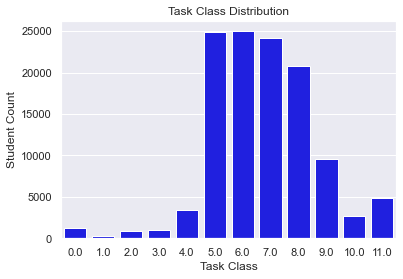

In [109]:
sns.countplot(x='task_class', data=clean_data, color = 'blue' ) #palette='Blues')
plt.title("Task Class Distribution")     # Title
plt.xlabel("Task Class")                 # X-axis label
plt.ylabel("Student Count")      
plt.show()

#clean_data.task_class.value_counts().plot(kind = 'bar') can also be used. but it is pandas and not good

sns.countplot(x='task_class', hue='gender', data=clean_data, palette='Set2')
plt.title("Task Class by Gender")
plt.show()

In [110]:
min_task_class = clean_data['task_class'].min()
max_task_class = clean_data['task_class'].max()

mean_task_class = clean_data['task_class'].mean()
mode_task_class = clean_data['task_class'].mode()
median_task_class = clean_data['task_class'].median()
std_task_class = clean_data['task_class'].std()
cv_task_class = std_task_class / mean_task_class

Q1_task_class = clean_data['task_class'].quantile(0.25)
Q3_task_class = clean_data['task_class'].quantile(0.75)
IQR_task_class =  Q3_task_class - Q1_task_class
skew_task_class = skew(clean_data['task_class'])
kurtosis_task_class = kurtosis(clean_data['task_class'])
Lower_bound_task_class = Q1_task_class - (1.5 * IQR_task_class)
Upper_bound_task_class = Q3_task_class + (1.5 * IQR_task_class)

print('min value of task class is: ', min_task_class)
print('max value of task class is: ', max_task_class)

print('mean of task class is: ', mean_task_class)
print('mode of task class is: ', mode_task_class)
print('median of task class is: ', median_task_class)
print('Q1 of task class is: ', Q1_task_class)
print('Q3 of task class is: ', Q3_task_class)
print('IQR of task class is: ', IQR_task_class)
print('Lower bound of task class is: ',Lower_bound_task_class)
print('Upper bound of task class is: ',Upper_bound_task_class)
print("Skewness of task_class is :", skew_task_class)
print("kurtosis of task_class is :", kurtosis_task_class)
print("standard deviation of task_class is :", std_task_class)
print("coeff. of variation of task_class is :", cv_task_class)


min value of task class is:  0.0
max value of task class is:  11.0
mean of task class is:  6.699191997570932
mode of task class is:  0    6.0
dtype: float64
median of task class is:  7.0
Q1 of task class is:  5.0
Q3 of task class is:  8.0
IQR of task class is:  3.0
Lower bound of task class is:  0.5
Upper bound of task class is:  12.5
Skewness of task_class is : -0.1257681655142419
kurtosis of task_class is : 1.2206549388114336
standard deviation of task_class is : 1.8611653139303634
coeff. of variation of task_class is : 0.2778193720384795


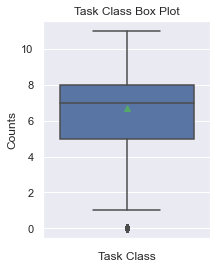

In [111]:
plt.figure(figsize=(3,4))
sns.boxplot(y='task_class', data=clean_data, showmeans=True)
plt.title('Task Class Box Plot')
plt.xlabel("Task Class")  
plt.ylabel("Counts")  
plt.show()

Analysis

The variable task_class ranges from 0 to 11, with a mean (M) of 6.7 and a median (Md) of 7.0, indicating that the data are centered around the middle of the scale. The close correspondence between the mean and median suggests an approximately symmetric distribution of values. In statistical terms, when the mean and median are nearly equal, the distribution is considered to be balanced, reflecting the absence of strong skewness. This observation is corroborated by the computed skewness coefficient of –0.125. As per conventional statistical interpretation, skewness values between –0.5 and +0.5 are considered approximately symmetrical, values between ±0.5 and ±1 indicate moderate skewness, and values beyond ±1 reflect high skewness. The obtained skewness of –0.125 therefore implies that the distribution is nearly symmetric with a minor left tail, suggesting that a small proportion of students are assigned to lower task classes, but not to an extent that meaningfully distorts the central tendency. The mode of 6 aligns closely with the mean and median, further validating the observation that most students are classified within the mid-level range of task categories.

The standard deviation of task_class is 1.86, which quantifies absolute dispersion around the mean on the 0–11 scale; as a practical heuristic for this ordinal scale, standard deviation values below 1 are commonly interpreted as low dispersion, values between 1 and 3 as moderate dispersion, and values above 3 as high dispersion. By this convention, the observed standard deviation of 1.86 falls within the moderate category, indicating that most student classifications deviate from the mean by roughly one to two task levels rather than being tightly clustered or widely scattered. The coefficient of variation (CV), which standardizes dispersion relative to the mean and is therefore more comparable across variables, is 0.2778. Common CV interpretation thresholds treat CV < 0.20 as low relative variability, CV between 0.20 and 0.50 as moderate relative variability, and CV > 0.50 as high relative variability; under these guidelines the CV of 0.2778 is also moderate, reinforcing the conclusion that variability in task assignment is controlled but not negligible. In sum, both absolute and relative measures place the variability of task_class in the moderate range, supporting the earlier interpretation that task allocation is consistent and predictable while allowing for reasonable natural variation across students.

The interquartile range (IQR) of 3.0, calculated as the difference between the 75th percentile (Q3 = 8.0) and the 25th percentile (Q1 = 5.0), indicates a moderate level of dispersion in the data. In general, a smaller IQR signifies greater clustering of observations around the median, while a larger IQR indicates higher variability. The value obtained here implies that 50% of all student classifications lie between task classes 5 and 8, confirming that the data are well-centered and not widely dispersed. Furthermore, to assess the degree of peakedness and tail heaviness of the distribution, kurtosis was computed. The calculated kurtosis value of 1.22 falls within the category of positive excess kurtosis, indicating a leptokurtic distribution. According to established interpretative standards, a kurtosis value near zero represents a mesokurtic distribution (normal-tailed), a positive value indicates leptokurtic behavior (heavy tails and a sharp peak), and a negative value denotes a platykurtic distribution (light tails and a flatter peak). The obtained kurtosis value of 1.22 therefore implies that the distribution of task_class has a slightly sharper peak and heavier tails than a normal distribution, meaning that most students are concentrated near the mean, with a few extending towards the extremes.

To examine the presence of potential outliers, the standard 1.5 × IQR method was applied, yielding a lower bound of 0.5 and an upper bound of 12.5. Observations lying below 0.5 or above 12.5 would be identified as outliers. Since the dataset ranges only between 0 and 11, no upper-bound outliers are present. However, the lower threshold classifies the value 0 as an outlier. Contextual domain understanding clarifies that task_class = 0 represents students who did not complete the evaluation process and were therefore not assigned a valid task label. Consequently, this value constitutes a semantic or contextual outlier rather than a statistical anomaly, and it reflects a meaningful data subgroup rather than an error.

Collectively, these findings establish that the task_class variable follows an almost symmetric, mildly leptokurtic distribution with a moderate spread and minimal skewness. The proximity of central tendency measures, low skewness magnitude, and moderate IQR confirm that task allocation is consistent and balanced across the student population. The shape characteristics of the distribution, defined by slightly heavy tails and a sharp central peak, further suggest a well-structured classification system where the majority of students fall within the middle range of task assignments, and deviations are limited primarily to unclassified cases rather than data irregularities.


Explanation

The analysis of the task_class data shows that student task assignments are balanced, consistent, and concentrated around the mid-level categories. Most students fall between task levels 5 and 8, with the highest concentration around level 6. This means that the majority of students are being assigned tasks within a moderate difficulty range, and very few are placed at extremely low or high levels.

When we compared the averages, we found that both the mean and the middle value (median) are almost identical. This tells us that the data is evenly distributed — there isn’t any major bias toward either the easier or harder task levels. The shape of the distribution also confirms this: there are no significant irregularities or uneven clustering that would suggest inconsistency in task allocation. In simple terms, students are being grouped fairly across the available categories.

We also looked at how tightly the data is spread. Around half of all students are within three task levels of each other, showing that the allocation process is not widely scattered. This moderate spread means our classification system is neither too narrow (everyone getting the same level) nor too random (everyone scattered across all levels).

Further analysis of how the data peaks shows that it’s slightly more concentrated around the middle compared to a typical balanced distribution. This indicates that our system tends to assign most students close to the average task level, with only a few students at the extreme ends. That’s a sign of a focused and consistent assignment process, not one that over-allocates students to very high or very low levels.

Finally, when checking for unusual values, we found that the only potential “outlier” is task level 0. However, this isn’t a data error — it represents students who didn’t complete the evaluation process, so no task level was assigned. These records simply show cases where the process was incomplete, not a flaw in the data itself.

Overall, the data confirms that the task allocation model is balanced, fair, and reliable. The distribution is centered, stable, and shows only a small degree of natural variation, which is expected in any real-world system. The few extreme values reflect incomplete evaluations rather than inconsistencies in task assignment. In business terms, this means the process of classifying students into task categories is functioning effectively, ensuring consistent evaluation outcomes and providing a dependable basis for future performance insights or policy adjustments.

In [112]:
#sns.histplot(clean_data['task_class'], kde=True, bins=12, color='teal')
#plt.title('Distribution of Task Class')
#plt.show()

### 5.1.2. os

The operating system used by the student when accessing the app (Android, iOS, Windows, etc.). Used for product analytics or behaviour studies.

In [113]:
clean_data['os'].value_counts()

iOS        52736
Android    42477
Windows    22244
Mac OS      1035
Linux         44
Other         15
Ubuntu        12
Solaris        1
Name: os, dtype: int64

In [114]:
# % of value counts
(clean_data['os'].value_counts(normalize= True)*100).round(2)

iOS        44.48
Android    35.83
Windows    18.76
Mac OS      0.87
Linux       0.04
Other       0.01
Ubuntu      0.01
Solaris     0.00
Name: os, dtype: float64

In [115]:
num_values_os = clean_data['os'].nunique()
mode_os = clean_data['os'].mode()
p_os = clean_data['os'].value_counts(normalize=True) 
entropy_os = -np.sum(p_os * np.log2(p_os)) # Shannon entropy formula = - summation [p(x)*log_2_p(x)]
normalized_entropy_os = entropy_os / np.log2(num_values_os)


print('Number of unique values in os :', num_values_os)
print('mode of os :', mode_os)
print("Entropy of os:", entropy_os)
print("Normalized Entropy of os:", round(normalized_entropy_os, 3))


Number of unique values in os : 8
mode of os : 0    iOS
dtype: object
Entropy of os: 1.5704165320692298
Normalized Entropy of os: 0.523


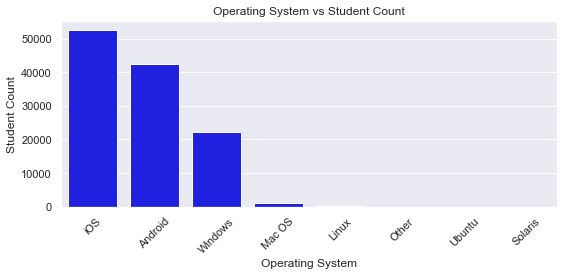

In [116]:
os_order = clean_data['os'].value_counts().index   # small Index of unique OS labels

#lets make a bar graph to view the distribution
plt.figure(figsize=(8,4))
sns.countplot(x='os', data=clean_data, order=os_order, color='blue')
plt.title('Operating System vs Student Count')
plt.xlabel('Operating System')
plt.ylabel('Student Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analysis
The variable operating_system comprises eight distinct categories representing the platforms used by students to access the application, namely iOS, Android, Windows, Mac OS, Linux, Other, Ubuntu, and Solaris. Frequency analysis revealed that iOS constitutes the largest user segment (44.48%), followed by Android (35.83%) and Windows (18.76%), while the remaining operating systems collectively account for less than one percent of total usage. The mode of the distribution is iOS, confirming its dominance within the sample. The calculated Shannon entropy of 1.57 bits, relative to a theoretical maximum of log₂(8) = 3.00 bits, yields a normalized entropy of approximately 0.52. According to standard interpretive thresholds, normalized entropy values below 0.30 indicate low diversity, between 0.30 and 0.60 represent moderate diversity, and above 0.60 correspond to high diversity. Hence, the obtained value signifies a moderately diverse user distribution. This implies that although iOS remains the predominant operating system, other platforms such as Android and Windows contribute meaningfully to overall access behavior. The presence of multiple active operating systems indicates that the application’s user base is not excessively concentrated on a single platform. Consequently, the operating_system variable exhibits a moderately diversified categorical distribution, supporting the need for continued cross-platform optimization and inclusive product analytics.


Explanation
User access across platforms shows a healthy spread, though iOS currently leads with 44% of users, followed by Android (36%) and Windows (19%). Smaller groups use Mac OS and other systems. This pattern means our app reaches audiences across all major operating systems, but the majority engagement still comes from iOS devices. The diversity score (entropy = 1.57) confirms a moderately varied user base — our audience isn’t limited to one platform, but it isn’t fully balanced either. In business terms, this is a positive sign: product performance and marketing should prioritize iOS and Android while continuing to support Windows users to maintain accessibility. The platform mix indicates that cross-platform experience remains important for sustaining engagement and growth, but optimization efforts can be guided by the fact that nearly 80% of students use either iOS or Android devices.

### 5.1.3. tutor

In [117]:
clean_data['tutor'].value_counts()

Unassigned    85323
Former        19074
Ongoing       14167
Name: tutor, dtype: int64

In [118]:
(clean_data['tutor'].value_counts(normalize = True)*100).round(2)

Unassigned    71.96
Former        16.09
Ongoing       11.95
Name: tutor, dtype: float64

In [119]:
num_values_tutor = clean_data['tutor'].nunique()
mode_tutor = clean_data['tutor'].mode()
p_tutor = clean_data['tutor'].value_counts(normalize=True)
entropy_tutor = -np.sum(p_tutor * np.log2(p_tutor))
max_entropy_tutor = np.log2(num_values_tutor)
normalized_entropy_tutor = entropy_tutor/max_entropy_tutor
print('number of unique values in tutor: ', num_values_tutor)
print('mode of tutor: ', mode_tutor)
print('shanon entropy of tutor is', entropy_tutor)
print('maximum entropy of tutor is', max_entropy_tutor)
print('normalized entropy of tutor is', normalized_entropy_tutor)



number of unique values in tutor:  3
mode of tutor:  0    Unassigned
dtype: object
shanon entropy of tutor is 1.131885558565235
maximum entropy of tutor is 1.584962500721156
normalized entropy of tutor is 0.7141402765366552


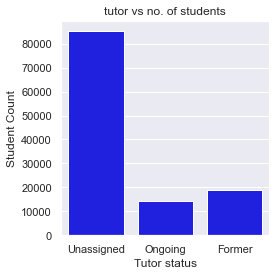

In [120]:
plt.figure(figsize=(4,4))
sns.countplot(x='tutor', data=clean_data, color='blue')
plt.title('tutor vs no. of students')
plt.xlabel('Tutor status')
plt.ylabel('Student Count')
plt.tight_layout()
plt.show()

Analysis

The variable tutor consists of three categorical states describing the student’s tutoring relationship: Unassigned, Former, and Ongoing. Frequency analysis shows that the majority of entries (71.96%) fall under the Unassigned category, followed by Former tutors (16.09%) and Ongoing tutors (11.95%). The modal category is therefore Unassigned, indicating that most students in the dataset do not currently have or have never had a tutor assigned. To evaluate the diversity of the distribution, Shannon entropy was calculated at 1.1319 bits. Given that the theoretical maximum entropy for three categories is log₂(3) = 1.5850 bits, the normalized entropy is 0.7141. According to established interpretive thresholds—where normalized entropy values below 0.30 indicate low diversity, values between 0.30 and 0.60 indicate moderate diversity, and values above 0.60 indicate high diversity—the tutor distribution exhibits high categorical diversity. This indicates that although the Unassigned category dominates numerically, the remaining categories contribute meaningfully to the overall variability of the variable. The distribution is therefore not overly concentrated in a single category and reflects a heterogeneous mix of student tutoring statuses. This pattern highlights the presence of distinct subgroups within the data and supports the need for differentiated analysis when evaluating tutoring-related outcomes.

Explanation

Most students in the dataset currently have no tutor assigned (about 72%), while the remaining students are split between those who had a tutor earlier (16%) and those who are actively working with a tutor (12%). Even though “Unassigned” is the largest group, the tutor statuses overall show a healthy level of diversity, meaning we have meaningful segments of students with past and ongoing tutor relationships. This diversity is reflected in the high normalized entropy score (0.71), which indicates that the tutor categories are not overly skewed toward only one type. In practical terms, this tells us that our student base contains clearly identifiable groups—students without tutoring support, students who previously received support, and students actively receiving support. This segmentation is important for decision-making, because each group may require different engagement strategies, communication plans, or intervention models. It also means that future analysis should treat these groups separately, as their behavior, retention, or learning needs are likely to differ in predictable ways.

### 5.1.4 job

 The parent's job category. Used for segmentation, e.g., working professionals vs. homemakers. Often collected during onboarding.

In [121]:
clean_data['job'].value_counts()

Unknown      82569
Finance      10680
Medicine      8513
Education     7150
IT            6374
Science       3278
Name: job, dtype: int64

In [122]:
(clean_data['job'].value_counts(normalize = True)*100).round(2)

Unknown      69.64
Finance       9.01
Medicine      7.18
Education     6.03
IT            5.38
Science       2.76
Name: job, dtype: float64

In [123]:
num_values_job = clean_data['job'].nunique()
mode_job = clean_data['job'].mode()
p_job = clean_data['job'].value_counts(normalize = True)
entropy = -np.sum(p_job * np.log2(p_job))
max_entropy = np.log2(num_values_job)
normalized_entropy = entropy/ max_entropy

print('no. of unique values in job are', num_values_job)
print('mode of unique values in job are', mode_job)
print('shanon entropy of job is', entropy)
print('Maximum entropy of job is',max_entropy)
print('Normalized entropy of job is',normalized_entropy)


no. of unique values in job are 6
mode of unique values in job are 0    Unknown
dtype: object
shanon entropy of job is 1.5633427972391325
Maximum entropy of job is 2.584962500721156
Normalized entropy of job is 0.6047835497818592


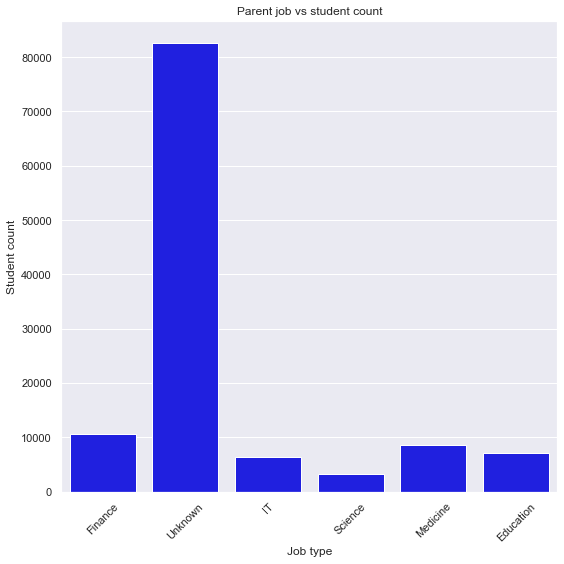

In [124]:
plt.figure(figsize = (8,8))
sns.countplot(x = 'job', data = clean_data, color = 'blue')
plt.title('Parent job vs student count')
plt.xlabel('Job type')
plt.xticks(rotation=45)
plt.ylabel('Student count')
plt.tight_layout()
plt.show()

Analysis

The job variable comprises six categories reflecting the parent’s professional background: Unknown, Finance, Medicine, Education, IT, and Science. The distribution is heavily dominated by the Unknown category, which accounts for 69.64% of all observations, followed by smaller but meaningful proportions of Finance (9.01%), Medicine (7.18%), Education (6.03%), IT (5.38%), and Science (2.76%). The mode of the distribution is Unknown, indicating a significant proportion of missing or undisclosed occupational information. Shannon entropy for this variable is 1.56 bits. Given six categories, the theoretical maximum entropy is log₂(6) = 2.58 bits, resulting in a normalized entropy of 0.60. According to standard interpretation—where values near 0 indicate low diversity, between 0.3 and 0.6 moderate diversity, and values above 0.6 high diversity—this variable demonstrates borderline moderate-to-high diversity. Although the Unknown category dominates numerically, the remaining job categories collectively introduce enough variability to prevent the distribution from being classified as low diversity. Thus, job exhibits substantial imbalance but retains moderate diversity, making it a categorical variable with both informational limitations and segmentation potential.

Explanation

Most parents in the system (about 70%) have not shared their job information, meaning the Unknown category dominates the dataset. Among those who did report their jobs, Finance, Medicine, Education, and IT represent meaningful segments. The diversity score (normalized entropy = 0.60) shows moderate category variation, which means we do have a mix of professional backgrounds — but it’s partially masked by the large number of unknown responses. From a business perspective, this indicates two things:

The platform attracts families from a broad set of professions, suggesting broad market reach.

A large portion of missing job data may limit precise customer segmentation.

Addressing the high “Unknown” share—perhaps by improving onboarding data collection—would significantly enhance targeting, personalization, and customer profiling.

### 5.1.5. Average_score

In [125]:
min_as = clean_data['average_score'].min()
max_as = clean_data['average_score'].max()
mean_as= clean_data['average_score'].mean()
mode_as= clean_data['average_score'].mode()
median_as= clean_data['average_score'].median()
std_as= clean_data['average_score'].std()
cv_as= std_as/ mean_as              

Q1_as = clean_data['average_score'].quantile(0.25)
Q3_as = clean_data['average_score'].quantile(0.75)
IQR_as = Q3_as-Q1_as
Lower_bound_as = Q1_as - (1.5*IQR_as)
Upper_bound_as = Q3_as + (1.5*IQR_as)

kurtosis_as = kurtosis(clean_data['average_score'])              
skewness_as = skew(clean_data['average_score'])        

              

print('min_value of average_score is:',  min_as)
print('max value of average_score is:', max_as)
print('mean value of average_score is:', mean_as)
print('mode value of average_score is:', mode_as)
print('median value of average_score is:', median_as)
print('standard deviation value of average_score is:', std_as)
print('Coeff of variation of average_score is:', cv_as)
print('Q1 of average_score is:', Q1_as)
print('Q3 of average_score is:', Q3_as)
print('IQR of average_score is:', IQR_as)
print('Lower bound of average_score is:', Lower_bound_as)
print('Upper bound of average_score is:', Upper_bound_as)
print('Kurtosis of average_score is:', kurtosis_as)
print('Skewness of average_score is:', skewness_as)


min_value of average_score is: 0.0
max value of average_score is: 100.0
mean value of average_score is: 77.22881737537013
mode value of average_score is: 0    100.0
dtype: float64
median value of average_score is: 81.20526315789475
standard deviation value of average_score is: 19.0084797387516
Coeff of variation of average_score is: 0.24613195416888253
Q1 of average_score is: 68.3333333333333
Q3 of average_score is: 91.25
IQR of average_score is: 22.9166666666667
Lower bound of average_score is: 33.95833333333325
Upper bound of average_score is: 125.62500000000006
Kurtosis of average_score is: 2.1999385577564414
Skewness of average_score is: -1.367535927774431


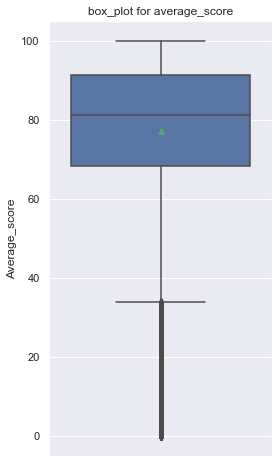

In [126]:
plt.figure(figsize = (4,8))
sns.boxplot(y = 'average_score', data = clean_data, showmeans = True)
plt.title('box_plot for average_score')
plt.ylabel('Average_score')
plt.show()

In [127]:
# Box blot shows a lot of outlier. Lets see how many values are outliers

In [128]:
lower_outliers_as = clean_data[clean_data['average_score'] < Lower_bound_as]
num_lower_outliers_as = lower_outliers_as.shape[0]
total_len = clean_data.shape[0]
lower_perc_as =  round((num_lower_outliers_as/ total_len)*100, 2)


print('no. of values at lower outliers are', num_lower_outliers_as)
print('percentage of values at lower outliers are', lower_perc_as)



no. of values at lower outliers are 4393
percentage of values at lower outliers are 3.71


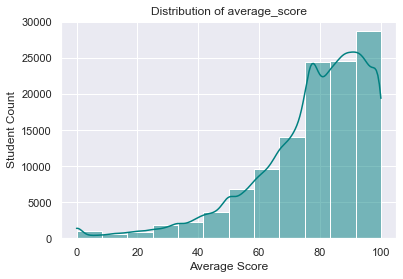

In [129]:
sns.histplot(clean_data['average_score'], kde=True, bins=12, color='teal')
plt.title('Distribution of average_score')
plt.xlabel('Average Score')
plt.ylabel('Student Count')
plt.show()

Analysis

The variable average_score spans the full range from 0 to 100, with a mean of 77.23 and a median of 81.21. The mean being lower than the median indicates a negatively skewed distribution, which is confirmed by the calculated skewness value of –1.37. According to standard skewness interpretation, values between –0.5 and +0.5 indicate an approximately symmetric distribution, values between ±0.5 and ±1 indicate moderate skewness, and values beyond ±1 indicate substantial skewness. Therefore, the obtained skewness of –1.37 demonstrates a strong left skew, caused primarily by a concentration of lower scores pulling the mean downward. The excess kurtosis of 2.20 further indicates that the distribution is leptokurtic, as kurtosis values above 0 reflect heavier tails and a sharper peak compared to the normal distribution. This suggests that while many students cluster near the higher score range, there also exists a meaningful fraction of extreme low-score cases.

The interquartile range (IQR = 22.92), defined by Q1 = 68.33 and Q3 = 91.25, reflects moderate dispersion around the center. The coefficient of variation (CV = 0.25) falls within the typical classification of low to moderate relative variability, given that CV < 0.30 generally indicates a stable distribution centered around its mean. The lower outlier threshold calculated using the 1.5×IQR rule is 33.96, and no upper outliers exist because the upper bound exceeds the theoretical maximum score of 100. A total of 4,393 students fall below the lower bound, representing 3.71% of the data, indicating that a small but statistically meaningful group performs significantly below the main population. Altogether, average_score exhibits a sharply peaked, left-skewed distribution characterized by high clustering of students in the upper-performance range and a thin but non-negligible tail of low performers, confirming strong asymmetry and heavy-tailed behavior.


Explanation

The average scores of students show a very clear pattern: most students perform strongly, with typical scores falling between the high 60s and low 90s. The central score is around 81, which means half of all students perform at or above this level. The average score (77) is slightly lower than the middle value (81), which tells us that a smaller group of low-scoring students is pulling the average downward. This aligns with the shape of the score distribution, which shows a long tail of low-performing students but a very dense concentration of high performers.

Score consistency is strong, as indicated by low-to-moderate variation (CV = 0.25). Most students fall within roughly ±20 points of the typical score range, showing that the learning experience delivers stable results for the majority of the population. Outlier analysis shows that about 3.7% of students score significantly below expected performance levels, marking them as a small but important group requiring targeted intervention or additional support. No unusually high scores exist beyond the normal 100-point limit. Overall, the data suggests that student performance is generally high and consistent, with a small but meaningful segment of low-scoring learners who may benefit from specialized attention, remediation programs, or adaptive learning pathways.

### 5.1.6. homework_done

Total number of homework tasks completed by the student. Zero doesn’t always mean “not done”; it might mean “never studied long enough.”

In [130]:
data['homework_done'].nunique()

98

In [131]:
data['homework_done'].unique()

array([   1,    5,    3,    0,   11,    4,    2,    9,    7,   10,    6,
         12,    8,   14,   13,   17,   15,   19,   31,   16,   18,   20,
         40,   33,   21,   22,   28,   30,   23,   26,   39,   73,   50,
         25,   56,   24,   46,   89,   27,   42,   36,   49,   29,   32,
         37,   34,  226,   65,  123,   77,   48,   71,   41,  162,  192,
         38,   44,   35,  186,   81,   47,   72,   67,  105,   99,  132,
         83,  233,   78,  340,  167,   52,   43,   69,  100,  180,   76,
        580,   85,   45,  407,  241,   64,   97,  379,   54,   80,   60,
         53,   75,   59,   66,  122, 2275,   51,  111,   94,   68],
      dtype=int64)

In [132]:
data['homework_done'].value_counts()

1      41855
2      22203
3      14264
4       9830
5       7048
       ...  
233        1
78         1
340        1
167        1
68         1
Name: homework_done, Length: 98, dtype: int64

In [133]:
# it is a discrete value type

In [134]:
hd_num_value_counts = clean_data['homework_done'].nunique()
hd_min = clean_data['homework_done'].min()
hd_max = clean_data['homework_done'].max()
hd_mean = clean_data['homework_done'].mean()
hd_median = clean_data['homework_done'].median()
hd_mode = clean_data['homework_done'].mode()
hd_std = clean_data['homework_done'].std()
hd_cv = hd_std/hd_mean
hd_Q1 = clean_data['homework_done'].quantile(0.25)
hd_Q3 = clean_data['homework_done'].quantile(0.75)
hd_IQR = hd_Q3-hd_Q1
hd_upper_bound = hd_Q3 + 1.5*hd_IQR
hd_lower_bound= hd_Q1 - 1.5*hd_IQR
hd_kurtosis = kurtosis(clean_data['homework_done'])
hd_skew = skew(clean_data['homework_done'])
p_hd = clean_data['homework_done'].value_counts(normalize = True)
hd_entropy = -np.sum(p_hd  * np.log2(p_hd))
hd_max_entropy = np.log2(hd_num_value_counts)
hd_norm_entropy = hd_entropy/ hd_max_entropy


In [135]:
print('min_value of homework_done is:',  hd_min)
print('max value of homework_done is:', hd_max)
print('mean value of homework_done is:', hd_mean)
print('mode value of homework_done is:', hd_mode)
print('median value of homework_done is:', hd_median)
print('standard deviation value of homework_done is:', hd_std)
print('Coeff of variation of homework_done is:', hd_cv)
print('Q1 of homework_done is:', hd_Q1)
print('Q3 of homework_done is:', hd_Q3)
print('IQR of homework_done is:', hd_IQR)
print('Lower bound of homework_done is:', hd_lower_bound)
print('Upper bound of homework_done is:', hd_upper_bound)
print('Kurtosis of homework_done is:', hd_kurtosis)
print('Skewness of homework_done is:', hd_skew)


min_value of homework_done is: 0
max value of homework_done is: 2275
mean value of homework_done is: 3.4778684929658246
mode value of homework_done is: 0    1
dtype: int64
median value of homework_done is: 2.0
standard deviation value of homework_done is: 8.247879764952007
Coeff of variation of homework_done is: 2.3715329609597906
Q1 of homework_done is: 1.0
Q3 of homework_done is: 4.0
IQR of homework_done is: 3.0
Lower bound of homework_done is: -3.5
Upper bound of homework_done is: 8.5
Kurtosis of homework_done is: 48859.96688600152
Skewness of homework_done is: 183.0461705300962


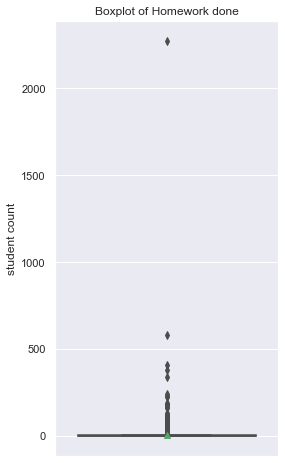

In [136]:
# lets create a box plot
plt.figure(figsize = (4,8))
sns.boxplot(y = 'homework_done', data = clean_data, color = 'blue', showmeans=True)
plt.title('Boxplot of Homework done')
plt.ylabel('student count')
plt.show()

In [137]:
# lets check how many outliers are there
hd_ub =clean_data[clean_data['homework_done']>hd_upper_bound]
hd_upo = hd_ub.shape[0]
print('no. of upper outliers', hd_upo)
#% of outliers
per_upo = round((hd_upo/(clean_data['homework_done'].shape[0]))*100, 2)
print('percentage of upper outliers', per_upo)

no. of upper outliers 9425
percentage of upper outliers 7.95


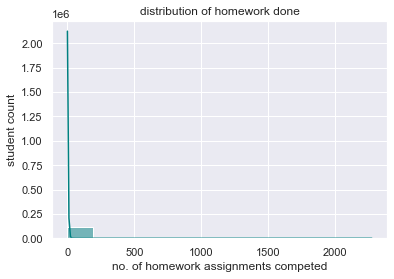

In [138]:
# lets look at the spread of data using kde
sns.histplot( x = data['homework_done'], kde = True, bins = 12, color = 'teal')
plt.title('distribution of homework done')
plt.xlabel('no. of homework assignments competed')
plt.ylabel('student count')
plt.show()

Analysis

The variable homework_done exhibits substantial variability, with values ranging from 0 to 2275 and a total of 98 distinct completion counts observed within the dataset. The distribution is heavily right-skewed (skewness = 183.05), indicating an extreme concentration of students who have completed only a small number of homework assignments, alongside a very small number of students who have completed exceptionally high counts. This is further reinforced by the extraordinarily high kurtosis value (≈ 48,860), which signals an extremely heavy-tailed and sharply peaked distribution—far beyond the conventional thresholds used to categorize mesokurtic (≈0), leptokurtic (>0), or platykurtic (<0) behavior. The median value of 2, combined with a mean of only 3.48, confirms the dominance of lower-completion students. The coefficient of variation (CV = 2.37) indicates extremely high relative variability, as values above 1 typically denote very dispersed data. The interquartile range (IQR = 3) shows that 50% of students fall between 1 and 4 homework completions, but the upper outlier threshold (8.5) identifies approximately 7.95% of students with unusually high homework counts, some reaching extreme maxima. The entropy score, when normalized, also indicates low diversity relative to the number of unique completion counts, showing that although the range is large, the distribution is highly concentrated around low homework counts. Altogether, the statistical profile demonstrates that homework_done is characterized by severe positive skewness, extremely heavy tails, and a clustering of the vast majority of students near minimal completion, with a thin but highly extreme subset of heavy-engagers.

Explanation

Most students complete very few homework tasks, and this is strongly reflected in the data. The typical student completes around 1–4 assignments, and nearly half of all students complete 2 or fewer, showing that homework engagement is generally low. Only a small portion of students complete large amounts of homework, and an even smaller fraction show extremely high completion counts—these are statistical outliers representing students who are exceptionally active compared to the rest. The pattern is highly uneven: while the average number of tasks completed is around 3.5, this average is pulled upward by a small group of heavy users. The majority are clustered at the low end. Approximately 8% of students complete far more homework than the typical range, including a very small number who complete hundreds or even thousands of tasks. This suggests a clear segmentation in engagement—most students show minimal homework participation, but a small high-engagement group may represent highly motivated learners or those with longer platform usage. From a business perspective, this indicates an opportunity to better understand why most students engage minimally and what drives the small, highly active group. Targeted interventions could be designed to lift overall homework participation, support under-engaged students, and leverage habits of top performers.

### 5.1.7. paywall_paid

Boolean value: True = the user has paid, False = not paid. Derived from transaction status.

In [139]:
clean_data['paywall_paid'].value_counts()

False    118556
True          8
Name: paywall_paid, dtype: int64

In [140]:
(clean_data['paywall_paid'].value_counts(normalize = True)*100).round(2)

False    99.99
True      0.01
Name: paywall_paid, dtype: float64

In [141]:
pp_mode = clean_data['paywall_paid'].mode()
pp_num_of_values = clean_data['paywall_paid'].nunique()
pp_p = clean_data['paywall_paid'].value_counts(normalize = True)
pp_entropy = -np.sum(pp_p * np.log2(pp_p))
pp_max_entropy = np.log2(pp_num_of_values)
pp_normalized = pp_entropy/pp_max_entropy



print('no. of unique values in paywall paid are', pp_num_of_values)
print('mode of unique values in paywall paid are', pp_mode)
print('shanon entropy of paywall paid is', pp_entropy)
print('Maximum entropy of paywall paid is',pp_max_entropy)
print('Normalized entropy of paywall paid is',pp_normalized)

no. of unique values in paywall paid are 2
mode of unique values in paywall paid are 0    False
dtype: bool
shanon entropy of paywall paid is 0.0010322157057999774
Maximum entropy of paywall paid is 1.0
Normalized entropy of paywall paid is 0.0010322157057999774


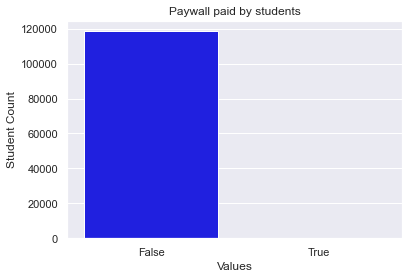

In [142]:
sns.countplot(x= 'paywall_paid', data = clean_data, color = 'blue')
plt.title('Paywall paid by students')
plt.xlabel('Values')
plt.ylabel('Student Count')
plt.show()

Analysis

The variable paywall_paid is a binary indicator capturing whether a user has completed a payment event within the system. The distribution is extremely imbalanced, with 118,556 users (99.99%) falling under the False category and only 8 users (0.01%) recorded as True. The mode of the distribution is False, reflecting the overwhelming dominance of non-paying users. Shannon entropy for this variable is 0.0010 bits, relative to a theoretical maximum of 1.0 bit for a binary attribute. According to established entropy thresholds—where values below 0.30 indicate very low diversity—the normalized entropy score of 0.001 decisively confirms minimal variability, meaning nearly the entire population is concentrated in a single category. This severe class imbalance suggests a highly skewed behavioural distribution with practically no dispersion across the two states. Consequently, paywall_paid exhibits an extremely low-diversity, high-concentration categorical structure, which has implications for modelling, payment conversion studies, and predictive analytics, where such imbalance may require specialized handling or re-weighting.

Explanation

Almost all students in the system have not paid, with 99.99% falling in the non-paying category and only 8 actual paying users recorded. This means that the paid user base is almost nonexistent in the dataset. The diversity score is close to zero, which simply means that users overwhelmingly behave in the same way — they do not purchase. In practical terms, this is a strong signal for decision-makers: conversion to payment is extremely low, and the current funnel is not generating meaningful revenue outcomes. Any product or marketing strategy based on the paywall must therefore focus on improving conversion, addressing onboarding gaps, reviewing pricing or messaging, and identifying friction points that prevent trial users from becoming paying customers. The behaviour here is not spread out — it is highly concentrated on “not paying,” indicating that the paywall experience needs significant intervention.

### 5.1.8. desktop_enter

desktop_enter = Indicates whether the student accessed the platform on a desktop at least once. Binary (0/1). Useful for behavioural segmentation.

In [143]:
clean_data['desktop_enter'].value_counts()

True     98167
False    20397
Name: desktop_enter, dtype: int64

In [144]:
(clean_data['desktop_enter'].value_counts(normalize = True)*100).round(2)

True     82.8
False    17.2
Name: desktop_enter, dtype: float64

In [145]:
# this is a boolean type

In [146]:
de_num_of_unique_values = clean_data['desktop_enter'].nunique()
de_mode = clean_data['desktop_enter'].mode()
de_p = clean_data['desktop_enter'].value_counts(normalize = True)
de_entropy = -np.sum(de_p * np.log2(de_p))
de_max_entropy = np.log2(de_num_of_unique_values )
de_norm_entropy = de_entropy/ de_max_entropy

print('no. of unique values in desktop enter paid are', de_num_of_unique_values)
print('mode of unique values in desktop enter paid are', de_mode)
print('shanon entropy of desktop enter is', de_entropy)
print('Maximum entropy of desktop enter is',de_max_entropy)
print('Normalized entropy of desktop enteris',de_norm_entropy)

no. of unique values in desktop enter paid are 2
mode of unique values in desktop enter paid are 0    True
dtype: bool
shanon entropy of desktop enter is 0.6623358767199543
Maximum entropy of desktop enter is 1.0
Normalized entropy of desktop enteris 0.6623358767199543


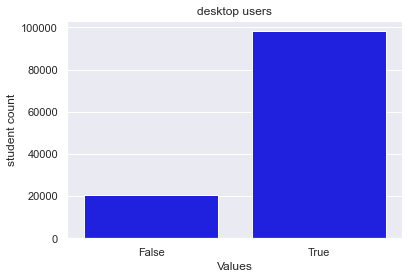

In [147]:
sns.countplot(x = 'desktop_enter', data = clean_data, color = 'blue')
plt.title('desktop users')
plt.xlabel('Values')
plt.ylabel('student count')
plt.show()

Analysis

The variable desktop_enter captures whether a student accessed the platform on a desktop device at least once and is recorded as a binary indicator with two unique values: True and False. Frequency analysis shows that 82.8% of students have used a desktop device, while 17.2% have exclusively used non-desktop interfaces such as mobile applications. The mode of the distribution is True, indicating that desktop access is the dominant behavior within the dataset. To further assess categorical diversity, Shannon entropy was calculated at 0.662, with a maximum possible entropy of 1.0 for a binary variable. According to standard entropy interpretation thresholds—where values close to 0 represent low diversity and values approaching 1 represent high diversity—the normalized entropy of 0.66 reflects a moderately diverse distribution of access behavior. This suggests that although desktop usage is clearly more common, there remains a meaningful minority of students who do not use desktop interfaces at all. The distribution therefore demonstrates a moderately concentrated but not fully skewed pattern of access, consistent with mixed-platform engagement behavior in digital learning environments.

Explanation

Most students—about 83%—use a desktop device at least once to access the platform, while the remaining 17% rely entirely on mobile or tablet usage. This indicates that desktop remains the primary environment through which students engage with the platform, but mobile-only users still form a sizeable segment worth paying attention to. The diversity score (entropy = 0.66) shows that while desktop usage is dominant, platform access is not limited to a single device type; a meaningful portion of users do not use desktops at all. From a business perspective, this means product teams should continue optimizing the desktop experience as the main channel, but should not neglect mobile-only users, as nearly one in five students rely exclusively on non-desktop devices. This insight is important for feature rollout planning, UI/UX parity, and prioritizing device-specific improvements.

### 5.1.9 add_homework_done

Additional homework completed beyond the standard tasks. Usually used for measuring engagement.

In [148]:
data['add_homework_done'].value_counts()

0      116152
1        1409
2         429
3         197
4          88
        ...  
32          1
229         1
70          1
163         1
18          1
Name: add_homework_done, Length: 70, dtype: int64

In [149]:
# This is a discrete type data

In [150]:
ahd_min = clean_data['add_homework_done'].min()
ahd_max = clean_data['add_homework_done'].max()
ahd_mean = clean_data['add_homework_done'].mean()
ahd_median = clean_data['add_homework_done'].median()
ahd_mode = clean_data['add_homework_done'].mode()
ahd_std = clean_data['add_homework_done'].std()
ahd_cv = ahd_std/ ahd_mean
ahd_Q1 = clean_data['add_homework_done'].quantile(0.25)
ahd_Q3 = clean_data['add_homework_done'].quantile(0.75)
ahd_IQR = ahd_Q3 - ahd_Q1
ahd_upper_bound = ahd_Q3 + 1.5*(ahd_IQR)
ahd_lower_bound =  ahd_Q1 - 1.5*(ahd_IQR)
ahd_kurtosis = kurtosis(clean_data['add_homework_done'])
ahd_skew = skew(clean_data['add_homework_done'])
ahd_num_values = clean_data['add_homework_done'].nunique()
ahd_p = clean_data['add_homework_done'].value_counts(normalize = True)
ahd_entropy = -np.sum(ahd_p * np.log2(ahd_p))
ahd_max_entropy = np.log2(ahd_num_values)
ahd_norm_entropy = ahd_entropy/ ahd_max_entropy

In [151]:
print('min_value of addition homework_done is:',  ahd_min)
print('max value of additional homework_done is:', ahd_max)
print('mean value of additional homework_done is:', ahd_mean)
print('mode value of additional homework_done is:', ahd_mode)
print('median value of additional homework_done is:', ahd_median)
print('standard deviation additional value of homework_done is:', ahd_std)
print('Coeff of variation of additional homework_done is:', ahd_cv)
print('Q1 of additional homework_done is:', ahd_Q1)
print('Q3 of additional homework_done is:', ahd_Q3)
print('IQR of additional homework_done is:', ahd_IQR)
print('Lower bound of additional homework_done is:', ahd_lower_bound)
print('Upper bound of additional homework_done is:', ahd_upper_bound)
print('Kurtosis of additional homework_done is:', ahd_kurtosis)
print('Skewness of additional homework_done is:', ahd_skew)
print('entropy of additional homework_done is:', ahd_entropy)
print('max entropy of additional homework_done is:', ahd_max_entropy)
print('normalized of additional homework_done is:', ahd_norm_entropy)


min_value of addition homework_done is: 0
max value of additional homework_done is: 2242
mean value of additional homework_done is: 0.10938396140481091
mode value of additional homework_done is: 0    0
dtype: int64
median value of additional homework_done is: 0.0
standard deviation additional value of homework_done is: 7.206260052747688
Coeff of variation of additional homework_done is: 65.88040842732492
Q1 of additional homework_done is: 0.0
Q3 of additional homework_done is: 0.0
IQR of additional homework_done is: 0.0
Lower bound of additional homework_done is: 0.0
Upper bound of additional homework_done is: 0.0
Kurtosis of additional homework_done is: 79484.26518170207
Skewness of additional homework_done is: 262.1408798053437
entropy of additional homework_done is: 0.18968320052688453
max entropy of additional homework_done is: 6.129283016944966
normalized of additional homework_done is: 0.03094704551943317


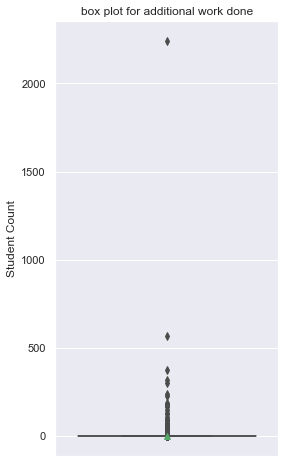

In [152]:
#box_plot
plt.figure(figsize = (4,8))
sns.boxplot(y = 'add_homework_done', data = clean_data, color = 'blue', showmeans = True)
plt.title('box plot for additional work done')
plt.ylabel('Student Count')
plt.show()

In [153]:
# outliers
ahd_outliers = clean_data[clean_data['add_homework_done']>ahd_upper_bound]
num_ahd_outliers = ahd_outliers.shape[0]
print('no. of outliers ', num_ahd_outliers)
total_values = clean_data['add_homework_done'].shape[0]
per_ahd_outliers =(num_ahd_outliers/ total_values)*100
print('percentage of outliers', per_ahd_outliers)

no. of outliers  2412
percentage of outliers 2.034344320367059


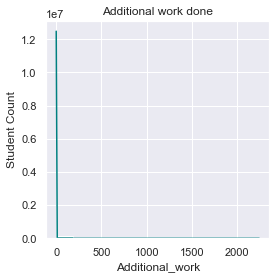

In [154]:
# plot distribution probaility using kde
plt.figure(figsize = (4,4))
sns.histplot(x = 'add_homework_done', data = clean_data, kde = "True", bins = 12, color = 'Teal')
plt.title('Additional work done')
plt.xlabel('Additional_work')
plt.ylabel('Student Count')
plt.show()

Analysis

The add_homework_done variable captures additional homework completed beyond the standard tasks and exhibits a highly skewed discrete distribution with 70 unique values. The minimum value is 0, while the maximum reaches 2242, but the distribution is overwhelmingly concentrated at the lower end, with a mean of 0.11 and a median and mode of 0. Standard descriptive measures confirm this extreme concentration: the first and third quartiles are both 0, yielding an interquartile range of 0 and an upper bound of 0 under the 1.5×IQR criterion. Consequently, any positive value is mathematically classified as an outlier, resulting in 2412 outliers, which represent approximately 2% of the dataset. This outcome is statistically appropriate given the extreme right-tail nature of the distribution. The coefficient of variation is exceptionally high (CV ≈ 65.88), far exceeding the typical thresholds for low (<0.2), moderate (0.2–0.5), or even high variability (>0.5), indicating extreme dispersion relative to the mean. The skewness value of 262.14 and kurtosis of 79,484 confirm an extraordinarily right-skewed and highly leptokurtic distribution, far beyond standard benchmarks where skewness >2 and kurtosis >7 are already considered severe. Entropy analysis shows an entropy of 0.19 against a maximum possible 6.13 (normalized ≈ 0.03), indicating very low categorical diversity, with nearly all observations concentrated at 0. Overall, the add_homework_done variable reflects a distribution dominated by non-participation, with rare but extremely large spikes in additional homework completion, making it a highly imbalanced and heavy-tailed feature.

Explanation

Additional homework activity is almost entirely absent for most students: 99% do no extra homework at all, while only a small fraction show any additional engagement. Even within that small group, behavior varies widely — some students complete just a few extra tasks, while a very small number complete unusually large amounts. This creates a distribution that is extremely unbalanced, where “extra homework” is not a common behavior but, when it happens, it happens in very different amounts. The diversity score (normalized entropy ≈ 0.03) confirms that the student base is almost completely concentrated in one category: zero additional homework. Roughly 2% of students show unusually high additional homework activity, indicating a small set of highly self-motivated learners. Overall, this metric shows that extra-task engagement is rare, but the few students who do engage tend to engage heavily. From a business perspective, this feature helps identify a very small high-engagement segment, suggesting opportunities for targeted nurturing, advanced modules, or personalized progression programs. The broader population, however, may require structured nudges or incentives to move beyond the basic homework requirements.


In [155]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118564 entries, 118211 to 52391
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   client_id                     118564 non-null  object        
 1   user_id                       118564 non-null  object        
 2   first_trial_appointment_date  17410 non-null   datetime64[ns]
 3   first_payment_date            807 non-null     datetime64[ns]
 4   os                            118564 non-null  object        
 5   tutor                         118564 non-null  object        
 6   job                           118564 non-null  object        
 7   task_class                    118564 non-null  float64       
 8   average_score                 118564 non-null  float64       
 9   homework_done                 118564 non-null  int64         
 10  paywall_paid                  118564 non-null  bool          
 11  desktop_e

### 5.1.10 is big city

In [156]:
data['is_big_city'].value_counts()

True     98941
False    19623
Name: is_big_city, dtype: int64

In [157]:
(data['is_big_city'].value_counts(normalize = True)*100).round(2)

True     83.45
False    16.55
Name: is_big_city, dtype: float64

In [158]:
ibs_num_of_unique_values = clean_data['is_big_city'].nunique()
ibs_mode = clean_data['is_big_city'].mode()
ibs_p = clean_data['is_big_city'].value_counts(normalize = True)
ibs_entropy = -np.sum(ibs_p * np.log2(ibs_p))
ibs_max_entropy = np.log2(ibs_num_of_unique_values )
ibs_norm_entropy = ibs_entropy/ ibs_max_entropy

print('no. of unique values in is_big_city paid are', ibs_num_of_unique_values)
print('mode of unique values in is_big_city paid are', ibs_mode)
print('shanon entropy of is_big_city is', ibs_entropy)
print('Maximum entropy of is_big_city is',ibs_max_entropy)
print('Normalized entropy of is_big_city is',ibs_norm_entropy)

no. of unique values in is_big_city paid are 2
mode of unique values in is_big_city paid are 0    True
dtype: bool
shanon entropy of is_big_city is 0.6473193764806343
Maximum entropy of is_big_city is 1.0
Normalized entropy of is_big_city is 0.6473193764806343


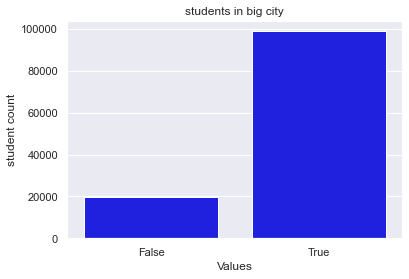

In [159]:
sns.countplot(x = 'is_big_city', data = clean_data, color = 'blue')
plt.title('students in big city')
plt.xlabel('Values')
plt.ylabel('student count')
plt.show()

Analysis

The variable is_big_city represents whether a student resides in a metropolitan or Tier-1 city and is recorded as a binary attribute with two categories: True and False. Frequency analysis shows that 83.45% of students are from big cities, while 16.55% belong to smaller towns, with the mode being True. The Shannon entropy of this distribution is 0.647 bits, relative to a maximum possible entropy of 1.0 for two categories, yielding a normalized entropy of approximately 0.65. According to standard entropy interpretation ranges—where values below 0.30 indicate low diversity, between 0.30 and 0.60 represent moderate diversity, and values above 0.60 correspond to high diversity—the is_big_city variable demonstrates high categorical concentration but with moderate diversity. This means that although students are clearly more concentrated in big cities, the presence of a sizeable minority from smaller towns introduces meaningful variability into the geographic distribution. Overall, this variable exhibits a moderately imbalanced but statistically informative distribution suitable for segmentation and further multivariate analysis.

Explanation

Most of our students come from big cities—about 83%, according to the data. This means the platform currently has a strong foothold in metropolitan regions, while students from smaller towns account for roughly 17% of the user base. The diversity score (normalized entropy ≈ 0.65) indicates that although the majority comes from larger cities, there is still enough representation from non-metro areas to form a meaningful secondary segment. For the business, this implies two things: first, marketing, product experience, and service delivery should continue to prioritize metro-city users, who currently form the dominant audience; second, the non-metro segment is large enough to justify a targeted strategy for expansion, accessibility, or pricing experiments. The distribution shows that growth opportunities exist outside big cities, but the current user behaviour is still strongly anchored in metro regions.

In [160]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118564 entries, 118211 to 52391
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   client_id                     118564 non-null  object        
 1   user_id                       118564 non-null  object        
 2   first_trial_appointment_date  17410 non-null   datetime64[ns]
 3   first_payment_date            807 non-null     datetime64[ns]
 4   os                            118564 non-null  object        
 5   tutor                         118564 non-null  object        
 6   job                           118564 non-null  object        
 7   task_class                    118564 non-null  float64       
 8   average_score                 118564 non-null  float64       
 9   homework_done                 118564 non-null  int64         
 10  paywall_paid                  118564 non-null  bool          
 11  desktop_e

Plot counts or users over time (daily or monthly trend).

### 5.1.11. Call_date

The date when an internal counsellor or sales team called the parent/student. This is often the most recent interaction and is extremely important for deduplication. Think of it as the “last touched date”.

In [161]:
# ----- 1. Ensure column is in datetime format -----
clean_data['call_date'] = pd.to_datetime(clean_data['call_date'], errors='coerce')

# ----- 2. Extract useful time components -----
clean_data['call_year'] = clean_data['call_date'].dt.year
clean_data['call_month'] = clean_data['call_date'].dt.month
clean_data['call_month_name'] = clean_data['call_date'].dt.month_name()
clean_data['call_day'] = clean_data['call_date'].dt.day
clean_data['call_day_name'] = clean_data['call_date'].dt.day_name()
clean_data['call_week'] = clean_data['call_date'].dt.isocalendar().week
clean_data['call_hour'] = clean_data['call_date'].dt.hour

# ----- 3. Basic summary -----
min_date = clean_data['call_date'].min()
max_date = clean_data['call_date'].max()
num_unique_dates = clean_data['call_date'].nunique()

# ----- 4. Frequency counts (univariate time exploration) -----
# Daily counts
daily_counts = clean_data['call_date'].dt.date.value_counts().sort_index()

# Monthly counts (year + month)
monthly_counts = clean_data.groupby(clean_data['call_date'].dt.to_period('M')).size()

# Yearly counts
yearly_counts = clean_data.groupby(clean_data['call_date'].dt.year).size()

# Day-of-week pattern
weekday_counts = clean_data['call_day_name'].value_counts()

# Hour-of-day pattern
hourly_counts = clean_data['call_hour'].value_counts().sort_index()

# ----- 5. Print everything -----
print("===== Datetime Univariate Summary =====")
print("Minimum call date:", min_date)
print("Maximum call date:", max_date)
print("Number of unique dates:", num_unique_dates)

print("\n===== Daily Trend =====")
print(daily_counts)

print("\n===== Monthly Trend =====")
print(monthly_counts)

print("\n===== Yearly Trend =====")
print(yearly_counts)

print("\n===== Day-of-Week Pattern =====")
print(weekday_counts)

print("\n===== Hour-of-Day Pattern =====")
print(hourly_counts)


===== Datetime Univariate Summary =====
Minimum call date: 2020-06-02 15:17:00
Maximum call date: 2020-09-15 19:01:00
Number of unique dates: 15339

===== Daily Trend =====
2020-06-02      88
2020-06-03     574
2020-06-04     495
2020-06-05      33
2020-06-17    1183
              ... 
2020-09-09    3940
2020-09-10    1317
2020-09-11    2289
2020-09-14    2175
2020-09-15    2591
Name: call_date, Length: 83, dtype: int64

===== Monthly Trend =====
call_date
2020-06    11017
2020-07    33041
2020-08    53356
2020-09    21150
Freq: M, dtype: int64

===== Yearly Trend =====
call_date
2020    118564
dtype: int64

===== Day-of-Week Pattern =====
Tuesday      26399
Monday       25154
Wednesday    24127
Thursday     21965
Friday       19244
Saturday      1371
Sunday         304
Name: call_day_name, dtype: int64

===== Hour-of-Day Pattern =====
6       544
7       209
8      1215
9       158
10    20325
11    18830
12    11284
13    17206
14    18408
15    11763
16     5754
17     8707
18     3

In [162]:
# group by date
daily_trend = clean_data['call_date'].dt.date.value_counts().sort_index()

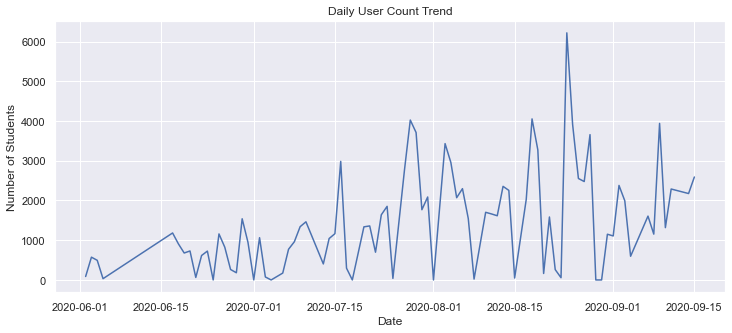

In [163]:
plt.figure(figsize=(12,5))
daily_trend.plot(kind='line')
plt.title('Daily User Count Trend')
plt.xlabel('Date')
plt.ylabel('Number of Students')
plt.show()

In [164]:
# group by month
monthly_trend = clean_data['call_date'].dt.to_period('M').value_counts().sort_index()

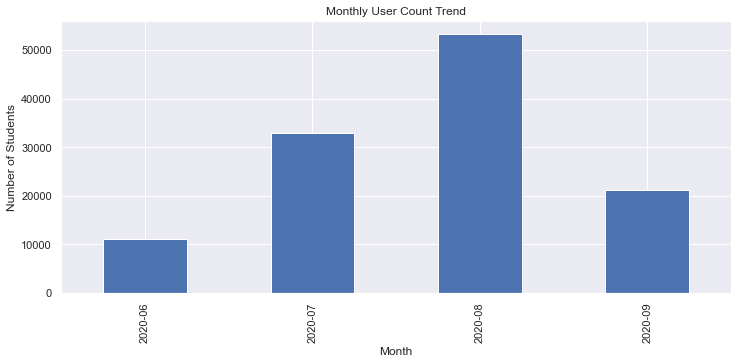

In [165]:
plt.figure(figsize=(12,5))
monthly_trend.plot(kind='bar')
plt.title('Monthly User Count Trend')
plt.xlabel('Month')
plt.ylabel('Number of Students')
plt.show()

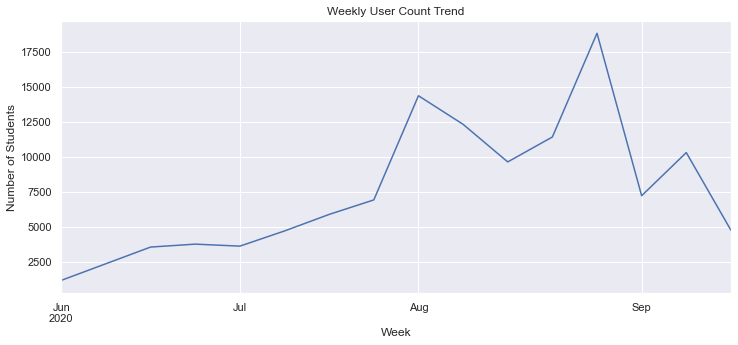

In [166]:
# weekly trend
weekly_trend = clean_data['call_date'].dt.to_period('W').value_counts().sort_index()

plt.figure(figsize=(12,5))
weekly_trend.plot(kind='line')
plt.title('Weekly User Count Trend')
plt.xlabel('Week')
plt.ylabel('Number of Students')
plt.show()

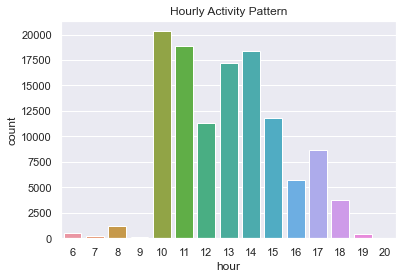

In [167]:
# time of day analysis
clean_data['hour'] = clean_data['call_date'].dt.hour
sns.countplot(x='hour', data=clean_data)
plt.title('Hourly Activity Pattern')
plt.show()

2020-06-02 15:17:00 2020-09-15 19:01:00 105


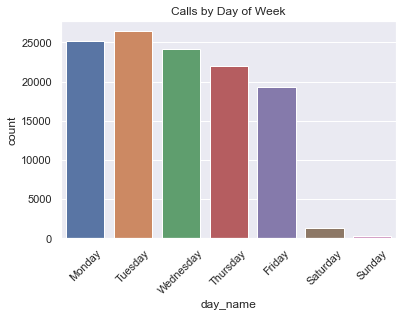

In [168]:
# ensure datetime format
clean_data['call_date'] = pd.to_datetime(clean_data['call_date'])

# extract components
clean_data['year'] = clean_data['call_date'].dt.year
clean_data['month'] = clean_data['call_date'].dt.month
clean_data['day'] = clean_data['call_date'].dt.day
clean_data['day_name'] = clean_data['call_date'].dt.day_name()
clean_data['week'] = clean_data['call_date'].dt.isocalendar().week

# basic stats
min_date = clean_data['call_date'].min()
max_date = clean_data['call_date'].max()
total_days = (max_date - min_date).days

print(min_date, max_date, total_days)


# day of week distribution
sns.countplot(x='day_name', data=clean_data, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Calls by Day of Week")
plt.xticks(rotation=45)
plt.show()


Analysis

he call_date variable captures the most recent interaction timestamp between the counsellor or sales team and the parent/student, and therefore serves as a key temporal marker for deduplication and recency-driven behavioural analysis. The dataset spans calls from 2 June 2020 to 15 September 2020, covering a total of 15339 unique timestamps. Daily activity demonstrates clear operational variability, with call volumes ranging from moderate (~500 calls/day) to exceptionally high peaks exceeding 3,000 calls per day, suggesting batch-driven outreach cycles or specific campaign effects. Monthly aggregation reveals a strong upward trend, with call counts rising from 11,017 in June to a peak of 53,356 in August, followed by a decline to 21,150 in September, likely due to campaign tapering or operational scheduling shifts. Year-level aggregation confirms that all call activity occurred exclusively in 2020, ensuring temporal consistency. A weekly pattern emerges in the day-of-week distribution: Tuesday, Monday, and Wednesday account for the majority of interactions, whereas weekend activity is minimal, reflecting operational constraints rather than user behaviour. Hour-of-day analysis shows a pronounced concentration during core working hours, particularly between 10 AM and 3 PM, with a sharp drop-off outside these intervals. Together, these patterns indicate that call_date reflects structured and highly planned outreach operations rather than random user touchpoints, and therefore serves as a reliable temporal anchor for downstream analyses such as deduplication, lead staging, recency scoring, and interaction modelling.

Explanation

The call_date field represents the last time our internal counsellor or sales team contacted a parent or student, making it one of the most important indicators for understanding how recently a lead was engaged. The data shows a clear business cycle: interactions increased sharply from June to August, suggesting strong outreach or campaign activity during that period, and then slowed in September. Most calls happen during weekdays—especially Monday, Tuesday, and Wednesday—and almost entirely during working hours, with activity peaking between 10 AM and 3 PM. Weekend calling was nearly nonexistent, confirming that outreach is structured and operationally planned rather than user-driven. These patterns highlight two key insights for the business: first, our recency signals (i.e., when someone was last contacted) are highly reliable because they follow systematic calling operations; second, the sharp weekday and mid-day concentration suggests that calling team efficiency, staffing, and conversion potential are strongly tied to these peak windows. Overall, call_date acts as a powerful operational metric that helps identify stale leads, prioritize follow-ups based on recency, and evaluate the intensity and timing of our counselling/sales outreach strategy.

### 5.1.12. first_trial_appointment_date

The date when the student first booked or attended a trial class. If missing, it means the student never scheduled a trial.

In [169]:
# i need graphs of daily, monthly, weekly, hourly, pattern of the first trial appointment date

In [170]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118564 entries, 118211 to 52391
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   client_id                     118564 non-null  object        
 1   user_id                       118564 non-null  object        
 2   first_trial_appointment_date  17410 non-null   datetime64[ns]
 3   first_payment_date            807 non-null     datetime64[ns]
 4   os                            118564 non-null  object        
 5   tutor                         118564 non-null  object        
 6   job                           118564 non-null  object        
 7   task_class                    118564 non-null  float64       
 8   average_score                 118564 non-null  float64       
 9   homework_done                 118564 non-null  int64         
 10  paywall_paid                  118564 non-null  bool          
 11  desktop_e

In [171]:
clean_data['trial_date'] = clean_data['first_trial_appointment_date'].dt.date

In [172]:
clean_data['trial_year'] = clean_data['first_trial_appointment_date'].dt.year

In [173]:
clean_data['trial_month'] = clean_data['first_trial_appointment_date'].dt.month

In [174]:
clean_data['trial_month_name'] = clean_data['first_trial_appointment_date'].dt.month_name()

In [175]:
clean_data['trial_day'] = clean_data['first_trial_appointment_date'].dt.day

In [176]:
clean_data['trial_day_name'] = clean_data['first_trial_appointment_date'].dt.day_name()

In [177]:
clean_data['trial_hour'] = clean_data['first_trial_appointment_date'].dt.hour

In [178]:
clean_data['trial_week'] = clean_data['first_trial_appointment_date'].dt.isocalendar().week

In [179]:
clean_data.head(100)

,client_id,user_id,first_trial_appointment_date,first_payment_date,os,tutor,job,task_class,average_score,homework_done,...,day_name,week,trial_date,trial_year,trial_month,trial_month_name,trial_day,trial_day_name,trial_hour,trial_week
118211,e70b23d3a33bfd86cf9fb4abc3841bfc,deb6a7518e99e7cfa03d55abaa6bcf7e,NaT,NaT,Android,Unassigned,Finance,9.0,19.000000,1,...,Tuesday,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
98383,abbf738c6741493d522a795573fc4119,265fbb0ad917dce4c8d507ddb062c779,NaT,NaT,Android,Unassigned,Unknown,6.0,87.000000,5,...,Tuesday,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
14361,0a71cec90c2c2fb90fe4e46cc122ac7e,428611238d0342ee18bb5e6536c67acf,NaT,NaT,Windows,Unassigned,Unknown,4.0,95.000000,1,...,Tuesday,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
70369,5a8e1f06faec2327f725164165c118aa,3bf4b18794aad476c9f44770e6236218,NaT,NaT,Android,Unassigned,Unknown,5.0,95.000000,1,...,Tuesday,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
64922,2032454e404a415cbc6bf8180e485845,235defd54f56856eeff0822ebe1f157c,NaT,NaT,Windows,Unassigned,Finance,6.0,91.666667,3,...,Tuesday,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30477,8e5b8ec5dda698bcb9e6436089bc21e4,ad0c79730d71ac69d014b7019cd455ec,2020-06-04 11:00:00,NaT,Android,Unassigned,Unknown,7.0,50.000000,1,...,Wednesday,23,2020-06-04,2020.0,6.0,June,4.0,Thursday,11.0,23
12210,58339ee789d394df49d338c603d36282,aca43435135b1a2c656622bafe8ce9f4,NaT,NaT,Android,Unassigned,Finance,3.0,24.000000,1,...,Wednesday,23,NaT,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
37915,ff2a1e356dbe1ebdc7ad08ad05afc250,7ae9c9e72d342b002f9349cf7f7c8eb4,NaT,NaT,Android,Unassigned,Finance,1.0,55.000000,1,...,Wednesday,23,NaT,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
100941,567aee7ea90c763961a180118639ba0a,c81fe5b128df41db43a6e713a744d05b,NaT,NaT,iOS,Unassigned,Finance,1.0,100.000000,1,...,Wednesday,23,NaT,NaN,NaN,NaN,NaN,NaN,NaN,<NA>


In [180]:
# daily trial appointment Trend

In [181]:
trial_data_counts = clean_data['trial_date'].value_counts().sort_index().reset_index()
trial_data_counts.columns = ['trial_date', 'student_count']

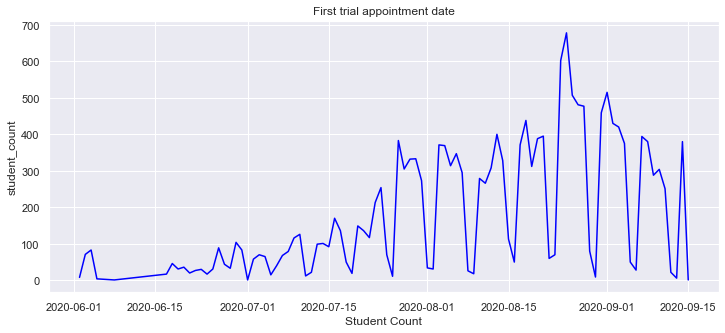

In [182]:
plt.figure(figsize = (12,5))
sns.lineplot(x = 'trial_date', y = 'student_count', data = trial_data_counts, color = 'blue')
plt.title('First trial appointment date')
plt.xlabel('date')
plt.xlabel('Student Count')
plt.show()

In [183]:
# Monthly trial trend

In [184]:
clean_data['trial_month_name'].value_counts().sort_index()

August       8876
July         3915
June          775
September    3844
Name: trial_month_name, dtype: int64

In [185]:
# but this is sorting alphabetically and not month wise

Group the data by month number and month name

→ groupby(['trial_month', 'trial_month_name'])

→ This ensures both the numeric month (e.g., 1,2,3…) and its readable label (Jan, Feb, Mar…) stay paired.

Count the number of records in each group

→ .size() returns the count of rows per group.

**Convert the grouped result into a proper DataFrame**

→ .reset_index(name='student_count')

→ Moves grouped values back into columns and renames the count column to student_count.

Sort chronologically using the month number

→ .sort_values('trial_month')

→ Ensures months are ordered in calendar order, not alphabetical order (e.g., Jan, Feb… instead of Apr, Aug…).

In [186]:
trial_month_counts = (
    clean_data.groupby(['trial_month', 'trial_month_name'])
    .size()
    .reset_index(name='student_count')
    .sort_values('trial_month')
)

In [187]:
trial_month_counts

,trial_month,trial_month_name,student_count
0,6.0,June,775
1,7.0,July,3915
2,8.0,August,8876
3,9.0,September,3844


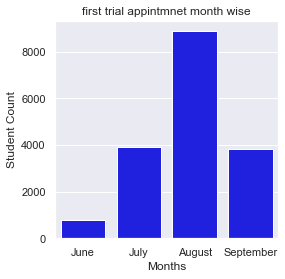

In [188]:
plt.figure(figsize = (4,4))
sns.barplot(x= 'trial_month_name', y = 'student_count', data = trial_month_counts, color = 'blue')
plt.title('first trial appintmnet month wise')
plt.xlabel('Months')
plt.ylabel('Student Count')
plt.show()

In [189]:
# weekly count trend

In [190]:
weekly_trial_counts = (
    clean_data
    .groupby(['trial_year', 'trial_month', 'trial_month_name', 'trial_week'])
    .size()
    .reset_index(name='student_count')
    .sort_values(['trial_year', 'trial_month', 'trial_week'])
)

In [191]:
weekly_trial_counts.head(5)

,trial_year,trial_month,trial_month_name,trial_week,student_count
0,2020.0,6.0,June,23,166
1,2020.0,6.0,June,24,1
2,2020.0,6.0,June,25,150
3,2020.0,6.0,June,26,271
4,2020.0,6.0,June,27,187


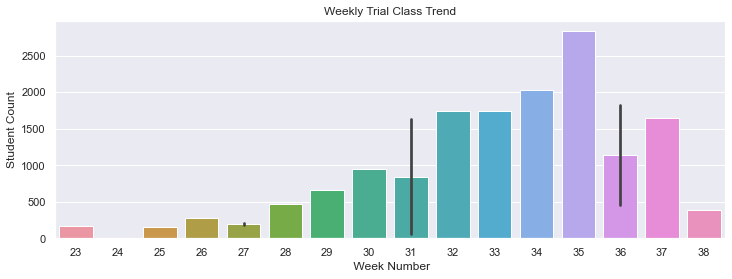

In [192]:
plt.figure(figsize = (12,4))
sns.barplot(
    data=weekly_trial_counts,
    x='trial_week',
    y='student_count')
plt.title("Weekly Trial Class Trend")
plt.xlabel(" Week Number")
plt.ylabel("Student Count")
plt.show()

In [193]:
# by days of week
day_of_week_trial = (
    clean_data
    .groupby('trial_day_name')
    .size()
    .reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    .reset_index(name='student_count')
)

.sort_values() → rearranges data based on values

.reindex() → rearranges data based on desired index order

In [194]:
day_of_week_trial

,trial_day_name,student_count
0,Monday,3659
1,Tuesday,3378
2,Wednesday,2885
3,Thursday,3390
4,Friday,3104
5,Saturday,662
6,Sunday,332


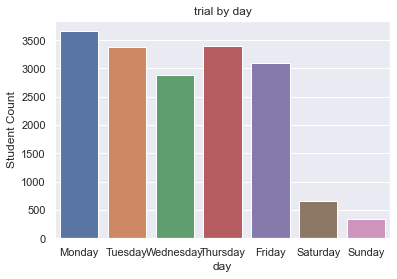

In [195]:
plt.figure(figsize = (6,4))
sns.barplot(x = 'trial_day_name', y = 'student_count', data = day_of_week_trial)
plt.title('trial by day')
plt.xlabel('day')
plt.ylabel('Student Count')
plt.show()

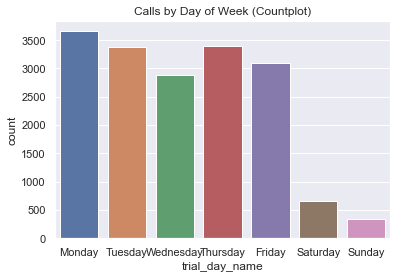

In [196]:
# another way

plt.figure(figsize=(6,4))
sns.countplot(x='trial_day_name', data=clean_data, order=[
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
])
plt.title("Calls by Day of Week (Countplot)")
plt.show()

In [198]:
# hourly_activity

clean_data['trial_hour'].value_counts()

10.0    2678
11.0    2627
14.0    2430
13.0    2286
15.0    1764
12.0    1528
17.0    1337
18.0    1311
16.0     963
19.0     442
20.0      33
9.0        8
21.0       2
8.0        1
Name: trial_hour, dtype: int64

In [201]:
trial_hour_counts = clean_data['trial_hour'].value_counts().sort_index().reset_index()
trial_hour_counts.columns = ['trial_hour', 'student_count']

In [202]:
trial_hour_counts

,trial_hour,student_count
0,8.0,1
1,9.0,8
2,10.0,2678
3,11.0,2627
4,12.0,1528
5,13.0,2286
6,14.0,2430
7,15.0,1764
8,16.0,963
9,17.0,1337


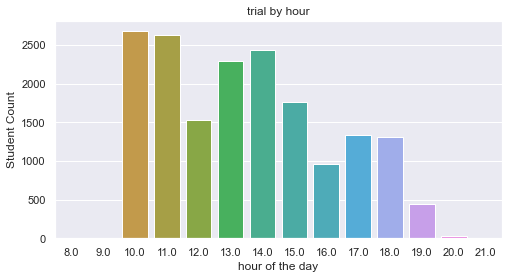

In [205]:
plt.figure(figsize = (8,4))
sns.barplot(x = 'trial_hour', y = 'student_count', data = trial_hour_counts)
plt.title('trial by hour')
plt.xlabel('hour of the day')
plt.ylabel('Student Count')
plt.show()

Analysis

he distribution of first trial appointments shows a sharply non-uniform temporal pattern concentrated between June and September 2020, with a total of 17,410 recorded trial dates. Daily counts reveal significant volatility rather than a smooth diffusion curve, with long periods of low activity in early June followed by steep surges in mid-August and early September. Monthly aggregation confirms a clear growth trajectory, rising from 775 trials in June to a peak of 8,876 in August, before dropping again in September (3,844). Weekly trends reinforce this pattern, showing that the highest activity clusters in Weeks 34–35, representing the core adoption period. The day-of-week pattern is strongly weekday-driven, with Monday through Friday accounting for over 90% of all trial bookings, while weekends show marginal activity. Hour-level analysis indicates a highly concentrated behavior pattern: most trials are booked between 10 AM and 3 PM, with 10–11 AM representing the single largest booking window. The overall structure of the data suggests an operationally driven scheduling mechanism rather than organically distributed consumer behavior, and the absence of trials outside business hours confirms this. Missing values make up the majority of rows, consistent with the fact that most users never schedule a trial class.


Explanation

Trial appointments are a leading indicator of conversion opportunity, and the timeline clearly shows that trial demand peaked in August, with nearly 3× more trial classes than July and 11× more than June. This indicates a campaign or seasonal lift rather than organic growth. The weekday dominance reveals that trials are treated as a formal sales touchpoint—parents are engaging during working days, and weekends represent lost opportunity space. The heavy concentration between 10 AM and 3 PM suggests both sales team workflow and parent availability shape demand, meaning capacity planning must align with this window. The drop after August signals churn in marketing momentum or limited sales follow-up. Weekly and daily views help eliminate the risk of false month-level assumptions—e.g., Week 35 alone delivered more trials than all of June. Finally, the absence of bookings outside business hours shows that the current model is not optimized for working parents, and future growth may require extended slots, automated scheduling, or self-service trial booking. In summary: the trial funnel works, but it is narrow, time-bound, and campaign-dependent—scaling it requires operational redesign, not just more leads.

### 5.1.13. first_payment_date

The date when the user first paid for any course. Null means the user never purchased.

In [206]:
clean_data['payment_date'] = clean_data['first_payment_date'].dt.date

clean_data['payment_year'] = clean_data['first_payment_date'].dt.year

clean_data['payment_month'] = clean_data['first_payment_date'].dt.month

clean_data['payment_month_name'] = clean_data['first_payment_date'].dt.month_name()

clean_data['payment_day'] = clean_data['first_payment_date'].dt.day

clean_data['payment_day_name'] = clean_data['first_payment_date'].dt.day_name()

clean_data['payment_hour'] = clean_data['first_payment_date'].dt.hour

clean_data['payment_week'] = clean_data['first_payment_date'].dt.isocalendar().week

In [207]:
clean_data

,client_id,user_id,first_trial_appointment_date,first_payment_date,os,tutor,job,task_class,average_score,homework_done,...,trial_hour,trial_week,payment_date,payment_year,payment_month,payment_month_name,payment_day,payment_day_name,payment_hour,payment_week
118211,e70b23d3a33bfd86cf9fb4abc3841bfc,deb6a7518e99e7cfa03d55abaa6bcf7e,NaT,NaT,Android,Unassigned,Finance,9.0,19.000000,1,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
98383,abbf738c6741493d522a795573fc4119,265fbb0ad917dce4c8d507ddb062c779,NaT,NaT,Android,Unassigned,Unknown,6.0,87.000000,5,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
14361,0a71cec90c2c2fb90fe4e46cc122ac7e,428611238d0342ee18bb5e6536c67acf,NaT,NaT,Windows,Unassigned,Unknown,4.0,95.000000,1,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
70369,5a8e1f06faec2327f725164165c118aa,3bf4b18794aad476c9f44770e6236218,NaT,NaT,Android,Unassigned,Unknown,5.0,95.000000,1,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
64922,2032454e404a415cbc6bf8180e485845,235defd54f56856eeff0822ebe1f157c,NaT,NaT,Windows,Unassigned,Finance,6.0,91.666667,3,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104924,3b27001145ede65d4170912333b219ba,f964054690b34acc40efb3bd16b6d859,NaT,NaT,Android,Unassigned,Unknown,3.0,92.500000,2,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
50411,c9f1f7b19db69133bec628a0f28a0ac3,bedd2d1077eb761b7b6832af32ec475f,NaT,NaT,Android,Unassigned,Unknown,5.0,92.307692,13,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
57491,65b95c97970cd664a385f02a11b23a19,3ed596d5fa5d8589153386f67c2e2745,NaT,NaT,Android,Unassigned,Unknown,6.0,74.000000,1,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
51057,8a35939b7dbeb514ab4ae029daaac40e,c121529aeb1b6e6d5392a6997c6e4cb4,NaT,NaT,Android,Ongoing,Unknown,5.0,86.000000,4,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>


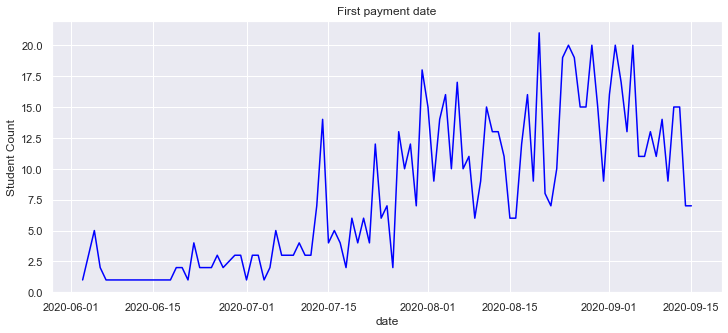

In [210]:
# daily trial appointment Trend

payment_data_counts = clean_data['payment_date'].value_counts().sort_index().reset_index()
payment_data_counts.columns = ['payment_date', 'student_count']

plt.figure(figsize = (12,5))
sns.lineplot(x = 'payment_date', y = 'student_count', data = payment_data_counts, color = 'blue')
plt.title('First payment date')
plt.xlabel('date')
plt.ylabel('Student Count')
plt.show()

In [213]:
# Monthly trial trend

clean_data['payment_month_name'].value_counts().sort_index()

# but this is sorting alphabetically and not month wise

August       396
July         174
June          38
September    199
Name: payment_month_name, dtype: int64

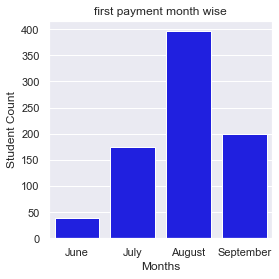

In [214]:
payment_month_counts = (
    clean_data.groupby(['payment_month', 'payment_month_name'])
    .size()
    .reset_index(name='student_count')
    .sort_values('payment_month')
)

trial_month_counts

plt.figure(figsize = (4,4))
sns.barplot(x= 'payment_month_name', y = 'student_count', data = payment_month_counts, color = 'blue')
plt.title('first payment month wise')
plt.xlabel('Months')
plt.ylabel('Student Count')
plt.show()

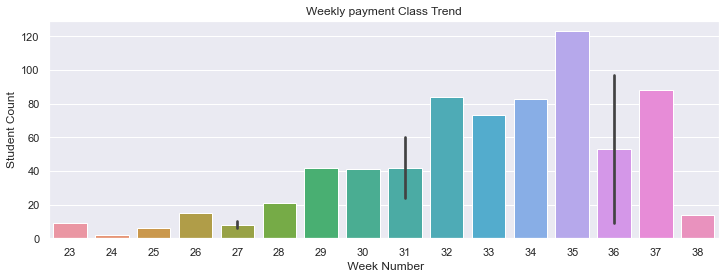

In [216]:
# weekly count trend

weekly_payment_counts = (
    clean_data
    .groupby(['payment_year', 'payment_month', 'payment_month_name', 'payment_week'])
    .size()
    .reset_index(name='student_count')
    .sort_values(['payment_year', 'payment_month', 'payment_week'])
)

weekly_payment_counts.head(5)

plt.figure(figsize = (12,4))
sns.barplot(
    data=weekly_payment_counts,
    x='payment_week',
    y='student_count')
plt.title("Weekly payment Class Trend")
plt.xlabel(" Week Number")
plt.ylabel("Student Count")
plt.show()

In [217]:
# by days of week
day_of_week_payment = (
    clean_data
    .groupby('payment_day_name')
    .size()
    .reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    .reset_index(name='student_count')
)

In [218]:
day_of_week_payment


,payment_day_name,student_count
0,Monday,118
1,Tuesday,141
2,Wednesday,106
3,Thursday,131
4,Friday,111
5,Saturday,113
6,Sunday,87


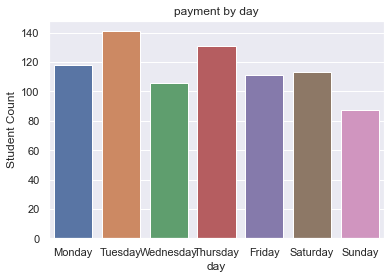

In [219]:

plt.figure(figsize = (6,4))
sns.barplot(x = 'payment_day_name', y = 'student_count', data = day_of_week_payment)
plt.title('payment by day')
plt.xlabel('day')
plt.ylabel('Student Count')
plt.show()

In [220]:
# hourly_activity

clean_data['payment_hour'].value_counts()

payment_hour_counts = clean_data['payment_hour'].value_counts().sort_index().reset_index()
payment_hour_counts.columns = ['payment_hour', 'student_count']

payment_hour_counts


,payment_hour,student_count
0,0.0,1
1,1.0,1
2,2.0,1
3,5.0,1
4,6.0,1
5,8.0,7
6,9.0,18
7,10.0,38
8,11.0,51
9,12.0,60


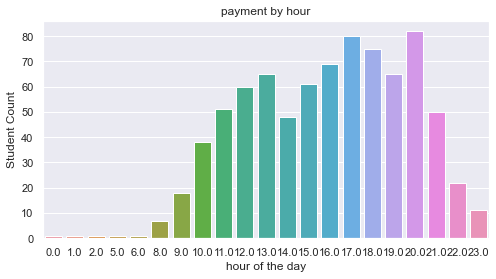

In [221]:

plt.figure(figsize = (8,4))
sns.barplot(x = 'payment_hour', y = 'student_count', data = payment_hour_counts)
plt.title('payment by hour')
plt.xlabel('hour of the day')
plt.ylabel('Student Count')
plt.show()

Analysis

The first_payment_date variable captures the timestamp of the user's first monetary transaction and is only available for 807 records out of 118,564, highlighting a very low conversion rate within the dataset. The temporal distribution reveals a clear concentration of payment activity in August (396 payments), followed by September (199) and July (174), with June showing minimal activity (38). Weekly trends show irregular but clustered payment behavior, with activity rising progressively through mid-August before tapering at the end of the period. Daily-of-week patterns indicate a fairly even spread across weekdays, with Tuesday (141) and Monday (118) showing the highest frequencies, while Sunday remains the lowest (87). Hourly analysis suggests payments peak during late working hours—primarily between 11:00–18:00—with minor noise in early morning and late-night transactions. Overall, payments are temporally sparse but show structured patterns linked to business hours and campaign-driven peaks.

Explanation

Payment behavior is extremely skewed—less than 1% of users ever complete a purchase—which immediately signals a conversion gap that must be addressed through funnel optimization. August stands out as the most successful month, likely reflecting either seasonal campaigns or improved acquisition strategy—meaning the timing of promotional efforts is critical and should be replicated. Most payments occur during the late morning to early evening window, indicating when users are most receptive to completing purchases; marketing nudges, payment reminders, and counselor follow-ups should be aligned to these peak hours. The relatively even weekday distribution suggests that conversion isn't strongly tied to a single day, but low weekend conversions indicate inefficiency in weekend outreach. Taken together, the findings show that revenue depends on a very small subset of users who convert in predictable time windows—signaling a need for aggressive retention strategy, better nurturing, and targeted interventions before trial users churn.

### 5.1.14. first_visit_date  

The date the user first visited the platform (website or app). This is their entry point into the funnel. Usually earlier than trial or payment dates.

In [224]:
clean_data['visit_date'] = clean_data['first_visit_date'].dt.date

clean_data['visit_year'] = clean_data['first_visit_date'].dt.year

clean_data['visit_month'] = clean_data['first_visit_date'].dt.month

clean_data['visit_month_name'] = clean_data['first_visit_date'].dt.month_name()

clean_data['visit_day'] = clean_data['first_visit_date'].dt.day

clean_data['visit_day_name'] = clean_data['first_visit_date'].dt.day_name()

clean_data['visit_hour'] = clean_data['first_visit_date'].dt.hour

clean_data['visit_week'] = clean_data['first_visit_date'].dt.isocalendar().week

In [225]:
clean_data

,client_id,user_id,first_trial_appointment_date,first_payment_date,os,tutor,job,task_class,average_score,homework_done,...,payment_hour,payment_week,visit_date,visit_year,visit_month,visit_month_name,visit_day,visit_day_name,visit_hour,visit_week
118211,e70b23d3a33bfd86cf9fb4abc3841bfc,deb6a7518e99e7cfa03d55abaa6bcf7e,NaT,NaT,Android,Unassigned,Finance,9.0,19.000000,1,...,NaN,<NA>,2020-05-13,2020,5,May,13,Wednesday,13,20
98383,abbf738c6741493d522a795573fc4119,265fbb0ad917dce4c8d507ddb062c779,NaT,NaT,Android,Unassigned,Unknown,6.0,87.000000,5,...,NaN,<NA>,2020-04-18,2020,4,April,18,Saturday,12,16
14361,0a71cec90c2c2fb90fe4e46cc122ac7e,428611238d0342ee18bb5e6536c67acf,NaT,NaT,Windows,Unassigned,Unknown,4.0,95.000000,1,...,NaN,<NA>,2020-05-14,2020,5,May,14,Thursday,12,20
70369,5a8e1f06faec2327f725164165c118aa,3bf4b18794aad476c9f44770e6236218,NaT,NaT,Android,Unassigned,Unknown,5.0,95.000000,1,...,NaN,<NA>,2020-05-15,2020,5,May,15,Friday,7,20
64922,2032454e404a415cbc6bf8180e485845,235defd54f56856eeff0822ebe1f157c,NaT,NaT,Windows,Unassigned,Finance,6.0,91.666667,3,...,NaN,<NA>,2020-04-27,2020,4,April,27,Monday,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104924,3b27001145ede65d4170912333b219ba,f964054690b34acc40efb3bd16b6d859,NaT,NaT,Android,Unassigned,Unknown,3.0,92.500000,2,...,NaN,<NA>,2020-05-04,2020,5,May,4,Monday,17,19
50411,c9f1f7b19db69133bec628a0f28a0ac3,bedd2d1077eb761b7b6832af32ec475f,NaT,NaT,Android,Unassigned,Unknown,5.0,92.307692,13,...,NaN,<NA>,2020-04-07,2020,4,April,7,Tuesday,19,15
57491,65b95c97970cd664a385f02a11b23a19,3ed596d5fa5d8589153386f67c2e2745,NaT,NaT,Android,Unassigned,Unknown,6.0,74.000000,1,...,NaN,<NA>,2020-04-29,2020,4,April,29,Wednesday,19,18
51057,8a35939b7dbeb514ab4ae029daaac40e,c121529aeb1b6e6d5392a6997c6e4cb4,NaT,NaT,Android,Ongoing,Unknown,5.0,86.000000,4,...,NaN,<NA>,2020-04-21,2020,4,April,21,Tuesday,12,17


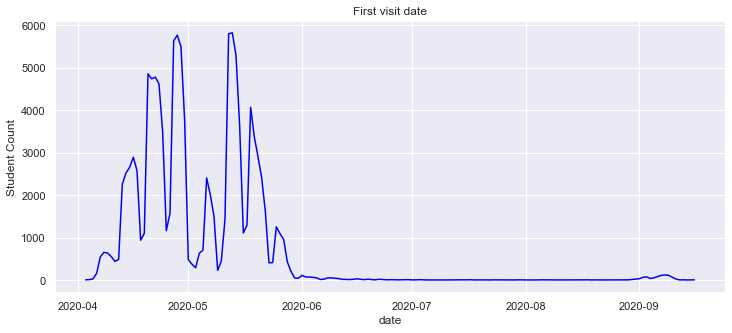

In [226]:
# daily trial appointment Trend

visit_data_counts = clean_data['visit_date'].value_counts().sort_index().reset_index()
visit_data_counts.columns = ['visit_date', 'student_count']

plt.figure(figsize = (12,5))
sns.lineplot(x = 'visit_date', y = 'student_count', data = visit_data_counts, color = 'blue')
plt.title('First visit date')
plt.xlabel('date')
plt.ylabel('Student Count')
plt.show()

In [227]:
# Monthly trial trend

clean_data['visit_month_name'].value_counts().sort_index()

# but this is sorting alphabetically and not month wise

April        64287
August          41
July            64
June           773
May          52630
September      769
Name: visit_month_name, dtype: int64

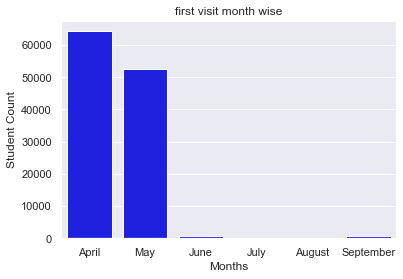

In [234]:
visit_month_counts = (
    clean_data.groupby(['visit_month', 'visit_month_name'])
    .size()
    .reset_index(name='student_count')
    .sort_values('visit_month')
)

visit_month_counts

plt.figure(figsize = (6, 4))
sns.barplot(x= 'visit_month_name', y = 'student_count', data = visit_month_counts, color = 'blue')
plt.title('first visit month wise')
plt.xlabel('Months')
plt.ylabel('Student Count')
plt.show()

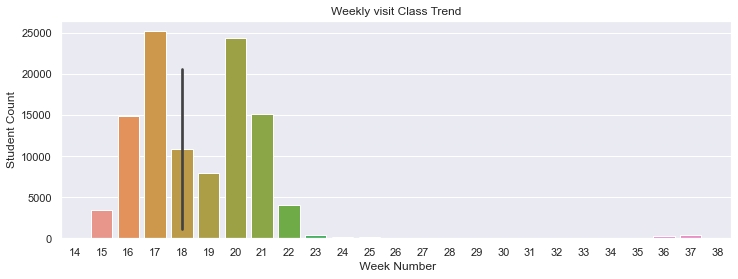

In [236]:
# weekly count trend

weekly_visit_counts = (
    clean_data
    .groupby(['visit_year', 'visit_month', 'visit_month_name', 'visit_week'])
    .size()
    .reset_index(name='student_count')
    .sort_values(['visit_year', 'visit_month', 'visit_week'])
)

weekly_visit_counts.head(5)

plt.figure(figsize = (12,4))
sns.barplot(
    data=weekly_visit_counts,
    x='visit_week',
    y='student_count')
plt.title("Weekly visit Class Trend")
plt.xlabel(" Week Number")
plt.ylabel("Student Count")
plt.show()

In [237]:
# by days of week
day_of_week_visit = (
    clean_data
    .groupby('visit_day_name')
    .size()
    .reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    .reset_index(name='student_count')
)

In [238]:
day_of_week_visit


,visit_day_name,student_count
0,Monday,20599
1,Tuesday,24873
2,Wednesday,25988
3,Thursday,22302
4,Friday,14216
5,Saturday,4806
6,Sunday,5780


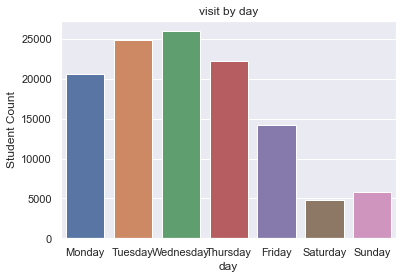

In [239]:

plt.figure(figsize = (6,4))
sns.barplot(x = 'visit_day_name', y = 'student_count', data = day_of_week_visit)
plt.title('visit by day')
plt.xlabel('day')
plt.ylabel('Student Count')
plt.show()

In [240]:
# hourly_activity

clean_data['visit_hour'].value_counts()

visit_hour_counts = clean_data['visit_hour'].value_counts().sort_index().reset_index()
visit_hour_counts.columns = ['visit_hour', 'visit_count']

visit_hour_counts


,visit_hour,visit_count
0,0,614
1,1,305
2,2,195
3,3,262
4,4,477
5,5,980
6,6,1475
7,7,2753
8,8,6431
9,9,10641


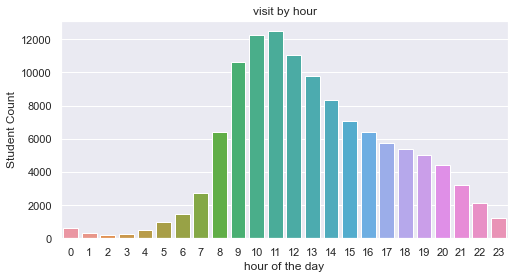

In [241]:

plt.figure(figsize = (8,4))
sns.barplot(x = 'visit_hour', y = 'visit_count', data = visit_hour_counts)
plt.title('visit by hour')
plt.xlabel('hour of the day')
plt.ylabel('Student Count')
plt.show()

Analysis

The first_visit_date variable captures the earliest recorded interaction between the user and the platform, making it the foundational timestamp in the customer lifecycle. The temporal distribution shows strong clustering in April (64,287 users) and May (52,630 users), followed by a sharp decline from June onward, indicating a large acquisition wave concentrated early in the dataset. Weekly aggregation further confirms this surge, with visit volume peaking during ISO weeks 18–20 and tapering off in later months. Daily trends and day-of-week patterns reveal a clear weekday-driven usage cycle, with Tuesday–Thursday consistently generating the highest traffic and weekends showing significantly lower engagement (especially Sunday at 5,780 users). Hourly analysis highlights a stable diurnal curve, with visit volume accelerating from 7 AM, peaking between 9 AM–12 PM (10k–12k visits per hour), and gradually declining after 4 PM. This distribution reflects structured, workday-aligned traffic rather than casual browsing, consistent with a product used by parents during planning or decision-making hours. Overall, the data demonstrates highly skewed temporal concentration, clear behavioral rhythms over days and hours, and saturation characteristics consistent with a cohort-based acquisition campaign.

Explanation

First visit data shows that the bulk of platform traffic was driven during a concentrated acquisition burst in April and May, after which new traffic dropped substantially. This means most users in the current database entered the funnel during the early marketing push, and sustained top-of-funnel acquisition after June was limited. Users primarily engage on weekdays, with Tuesday to Thursday being the most active days—ideal periods for running funnels, remarketing, and call outreach. Weekends are comparatively inactive, so scheduling follow-ups or campaigns then will yield low efficiency. The strongest engagement window is morning to early afternoon, with visits consistently peaking between 9 AM and noon. That window defines the platform’s “prime hours” and should guide both product activation nudges and sales outreach timing. The sharp fall-off after May is a business risk: unless another large acquisition wave is triggered, future revenue potential is capped by cohort size. This field acts as the starting point of the funnel, and analyzed over time, it makes it clear when demand generation was working and when it stalled.

## 5.2. Bivariate Analysis

Explore relationships between two variables — find associations, correlations, dependencies.

Numercial Vs Numrical

Category Vs Category

Numerical Vs Category

Temporal bivariate

### 5.2.1 Numerical Analysis

Compute correlation matrix (Pearson, Spearman if non-linear)

Plot scatterplots (with regression line)

Plot pairplots for grouped numeric fields

Compute covariance

Check correlation heatmap

Detect multicollinearity (VIF later in modelling stage, not now)

Identify linear vs non-linear relationships

Examples you MUST include:

task_class vs average_score

average_score vs homework_done

homework_done vs add_homework_done